In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\data\winning-ways\Tour_Winners_data_1.csv', sep=',')
df2 = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\data\winning-ways\Tour_Winners_data_2.csv', sep=',')
df3 = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\data\winning-ways\Tour_Winners_data_3.csv', sep=',')

In [ ]:
df1.tail()

In [ ]:
df2.head()

In [ ]:
df3.head()

In [4]:
merged_df = df1.merge(df2, on=['Year', 'Tour_No', 'Winner'], how='inner').merge(df3, on=['Year', 'Tour_No', 'Winner'], how='inner')
merged_df.tail()

Year  Tour_No               Winner Country            Team  \
105  1907        5  Lucien Petit-Breton  France  Cycles Peugeot   
106  1906        4         Rene Pottier  France  Cycles Peugeot   
107  1905        3    Louis Trousselier  France  Cycles Peugeot   
108  1904        2        Henri Cornet   France       Cycles JC   
109  1903        1        Maurice Garin  France    La Francaise   

    Tour_overall_length_(km)  age   BMI  weight_(Kg)  height_(m)  \
105                  \t4,488   24   NaN          NaN         NaN   
106                     4637   27   NaN          NaN         NaN   
107                     2994   24   NaN          NaN         NaN   
108                     2428   19   NaN          NaN         NaN   
109                     2428   32  22.9         60.0    1.618668   

    rider_type_(PPS) close_rider_type_(PPS)  pre_tour_GC_wins   \
105          climber                    NaN                  0   
106          climber                    NaN                  0   
107          climber                    NaN                  0   
108          climber                    NaN                  0   
109         sprinter                    NaN                  0   

     pre_tour_wins   total_completed_stage_races   total_completed_day_races  \
105               2                             0                          3   
106               0                             0                          1   
107               2                             0                          2   
108               0                             0                          1   
109               1                             0                          1   

     GT_wins  NAT _TT_wins  NAT_RR_wins   Worlds_RR_ wins  
105        0             0             0                0  
106        0             0             0                0  
107        0             0             0                0  
108        0             0             0                0  
109        0             0             0                0

In [ ]:
merged_df.tail()

In [ ]:
merged_df.dtypes

In [5]:
# Change column names to lowercase
merged_df.columns = merged_df.columns.str.lower()

In [6]:
# rename columns
merged_df.rename(columns={
    'tour_overall_length_(km)': 'tour_overall_length_km',
    'weight_(kg)': 'weight_kg',
    'height_(m)': 'height_m'
}, inplace=True)


In [7]:
# Delete spaces at the end of column names
print("Before:", merged_df.columns.tolist())
merged_df.columns = merged_df.columns.str.strip()
print("After:", merged_df.columns.tolist())

Before: ['year', 'tour_no', 'winner', 'country', 'team', 'tour_overall_length_km', 'age', 'bmi', 'weight_kg', 'height_m', 'rider_type_(pps)', 'close_rider_type_(pps)', 'pre_tour_gc_wins ', 'pre_tour_wins ', 'total_completed_stage_races ', 'total_completed_day_races', 'gt_wins', 'nat _tt_wins', 'nat_rr_wins ', 'worlds_rr_ wins']
After: ['year', 'tour_no', 'winner', 'country', 'team', 'tour_overall_length_km', 'age', 'bmi', 'weight_kg', 'height_m', 'rider_type_(pps)', 'close_rider_type_(pps)', 'pre_tour_gc_wins', 'pre_tour_wins', 'total_completed_stage_races', 'total_completed_day_races', 'gt_wins', 'nat _tt_wins', 'nat_rr_wins', 'worlds_rr_ wins']


In [8]:
# Fix extra spaces in column names
merged_df = merged_df.rename(columns={
    'nat _tt_wins': 'nat_tt_wins',
    'worlds_rr_ wins': 'worlds_rr_wins'
})


In [9]:
# Convert 'tour_overall_length_km' to numeric, coercing errors
merged_df['tour_overall_length_km'] = pd.to_numeric(merged_df['tour_overall_length_km'], errors='coerce')

In [10]:
df_merged = merged_df.copy()

In [11]:
# Check for missing values
missing_values = df_merged.isnull().sum()
print("Missing values in each column:")

Missing values in each column:


In [12]:
# Check for duplicate rows
duplicate_rows = df_merged.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [13]:
# Check for null values
null_values = df_merged.isnull().sum()
print("Null values in each column:")

Null values in each column:


In [ ]:
merged_df.describe()

In [14]:
pd.set_option("display.max_columns", None)

In [ ]:
merged_df.tail()

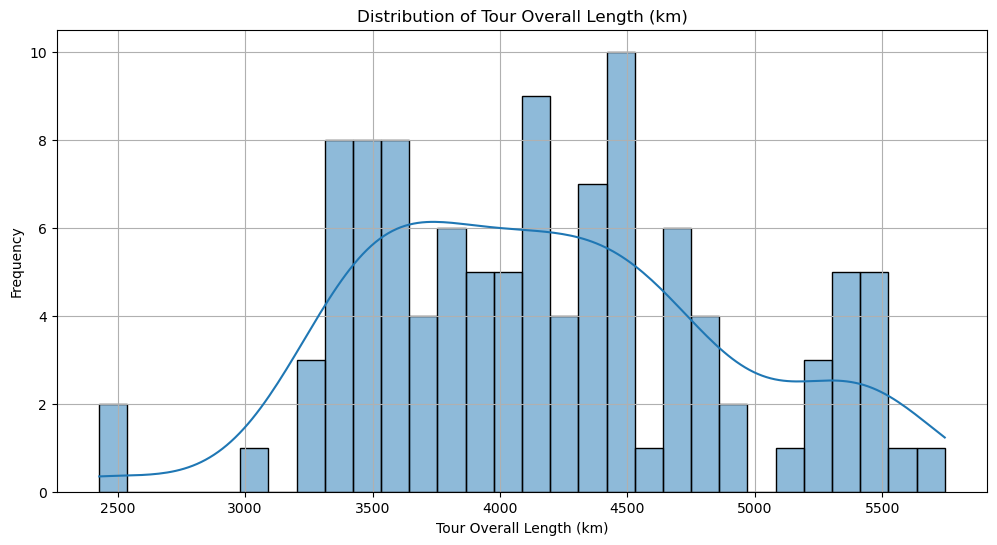

In [15]:
# Plotting the distribution of stage distances
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['tour_overall_length_km'], bins=30, kde=True)
plt.title('Distribution of Tour Overall Length (km)')
plt.xlabel('Tour Overall Length (km)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [16]:
# Filter and display data for years 1907 to 1914
df_1907_1914 = merged_df[(merged_df['year'] >= 1907) & (merged_df['year'] <= 1914)]
df_1907_1914

year  tour_no               winner     country            team  \
98   1914       12        Philippe Thys     Belgium  Cycles Peugeot   
99   1913       11        Philippe Thys     Belgium  Cycles Peugeot   
100  1912       10        Odile Defraye     Belgium          Alycon   
101  1911        9     Gustave Garrigou      France          Alycon   
102  1910        8        Octave Lapize      France          Alycon   
103  1909        7       Francois Faber  Luxembourg          Alycon   
104  1908        6  Lucien Petit-Breton      France  Cycles Peugeot   
105  1907        5  Lucien Petit-Breton      France  Cycles Peugeot   

     tour_overall_length_km  age   bmi  weight_kg  height_m rider_type_(pps)  \
98                   5380.0   24   NaN        NaN       NaN          climber   
99                   5287.0   23   NaN        NaN       NaN          climber   
100                  5289.0   24   NaN        NaN       NaN         sprinter   
101                  5344.0   27   NaN        NaN       NaN          climber   
102                  4734.0   21   NaN        NaN       NaN          climber   
103                  4497.0   22  27.8       88.0  1.779176          climber   
104                  4487.0   25   NaN        NaN       NaN          climber   
105                     NaN   24   NaN        NaN       NaN          climber   

    close_rider_type_(pps)  pre_tour_gc_wins  pre_tour_wins  \
98               sprinter                  0              1   
99               sprinter                  0              0   
100               climber                  1              4   
101                    NaN                 0              1   
102              sprinter                  0              2   
103                    NaN                 0              2   
104                    NaN                 1              5   
105                    NaN                 0              2   

     total_completed_stage_races  total_completed_day_races  gt_wins  \
98                             0                          2        1   
99                             0                          1        0   
100                            1                          2        0   
101                            0                          5        0   
102                            0                          5        0   
103                            0                          7        0   
104                            1                          2        1   
105                            0                          3        0   

     nat_tt_wins  nat_rr_wins  worlds_rr_wins  
98             0            0               0  
99             0            0               0  
100            0            1               0  
101            0            0               0  
102            0            0               0  
103            0            0               0  
104            0            0               0  
105            0            0               0

In [17]:
# Fix missing value for 'tour_overall_length_km' in 1907 (Wikipedia data)
merged_df.loc[merged_df['year'] == 1907, 'tour_overall_length_km'] = 4488

In [18]:
# Define the missing year ranges
missing_years_ranges = list(range(1914, 1920)) + list(range(1939, 1948))

# Extract years present in the dataset
present_years = merged_df['year'].unique()

# Find missing years in the specified ranges
missing_years = [year for year in missing_years_ranges if year not in present_years]
print("Missing years in dataset (1914-1919 and 1939-1947):", missing_years)

Missing years in dataset (1914-1919 and 1939-1947): [1915, 1916, 1917, 1918, 1940, 1941, 1942, 1943, 1944, 1945, 1946]


In [19]:
# Update missing_years and missing_years_ranges to match the specified list
missing_years = [1915, 1916, 1917, 1918, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
missing_years_ranges = missing_years.copy()

In [ ]:
merged_df.dtypes

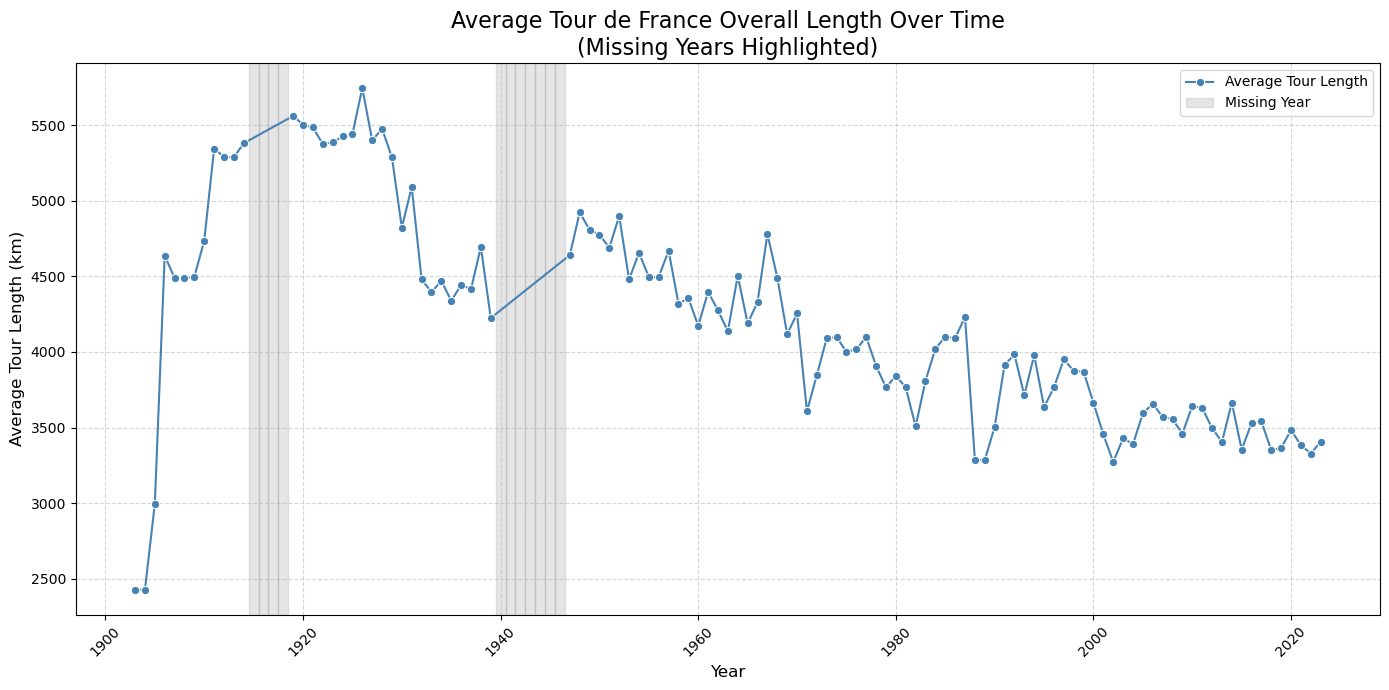

In [20]:
# Calculate average tour length per year
avg_tour_length = merged_df.groupby('year', as_index=False)['tour_overall_length_km'].mean()

plt.figure(figsize=(14, 7))

# Plot the average tour length
sns.lineplot(data=avg_tour_length, x='year', y='tour_overall_length_km', marker='o', label='Average Tour Length', color='steelblue')

# Add grey vertical bands for missing years (e.g., WWI and WWII)
for i, year in enumerate(missing_years):
    # Only label the first shaded area to avoid duplicates
    plt.axvspan(year - 0.5, year + 0.5, color='grey', alpha=0.2, label='Missing Year' if i == 0 else "")

# Labels and title
plt.title('Average Tour de France Overall Length Over Time\n(Missing Years Highlighted)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Tour Length (km)', fontsize=12)
plt.xticks(rotation=45)

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.5)

# Unique legend entries only
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.tight_layout()
plt.show()


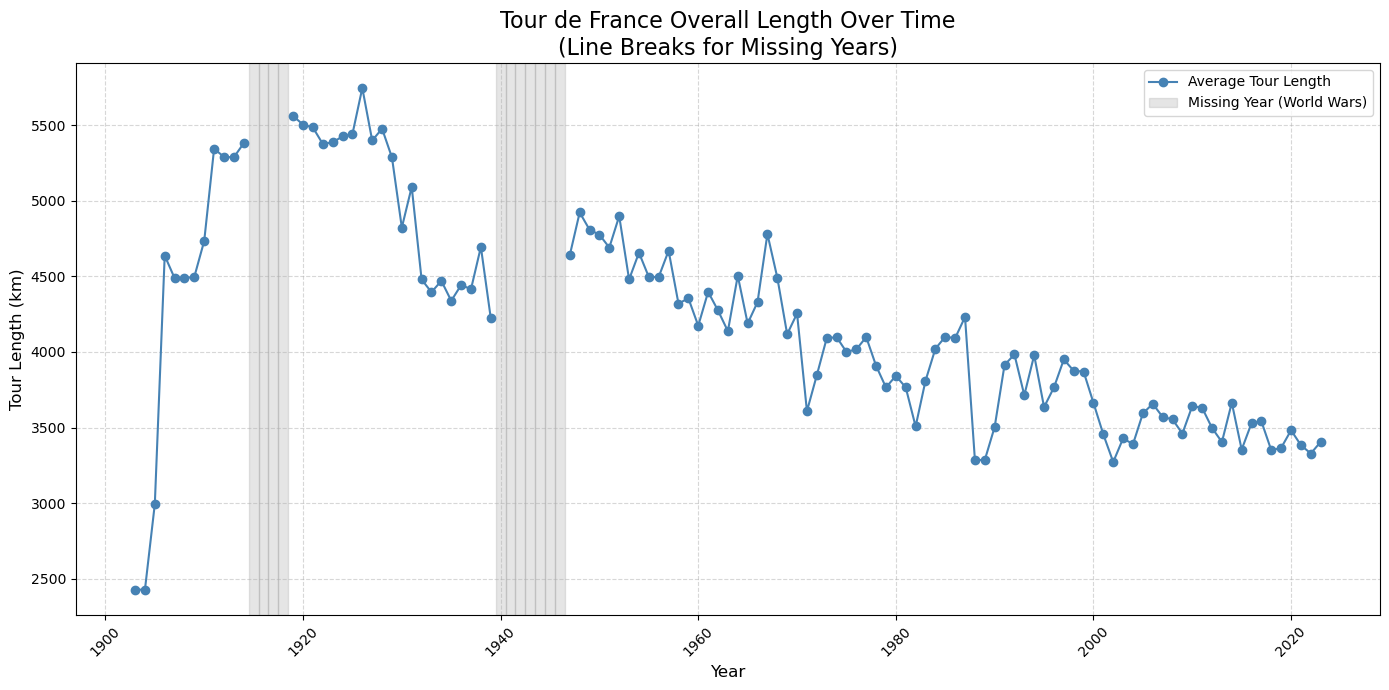

In [21]:
from matplotlib.collections import LineCollection

# Copy and insert NaNs for all missing_years_ranges
avg_tour_length_with_nans = avg_tour_length.copy()
for year in missing_years_ranges:
    if year not in avg_tour_length_with_nans['year'].values:
        avg_tour_length_with_nans.loc[len(avg_tour_length_with_nans)] = [year, np.nan]

# Sort by year
avg_tour_length_with_nans = avg_tour_length_with_nans.sort_values('year')

# Identify continuous segments (no NaN breaks)
segments = []
current_segment = []
for _, row in avg_tour_length_with_nans.iterrows():
    if np.isnan(row['tour_overall_length_km']):
        if current_segment:
            segments.append(current_segment)
            current_segment = []
    else:
        current_segment.append((row['year'], row['tour_overall_length_km']))
if current_segment:
    segments.append(current_segment)

plt.figure(figsize=(14, 7))
for seg in segments:
    seg = np.array(seg)
    plt.plot(seg[:, 0], seg[:, 1], marker='o', color='steelblue', label='Average Tour Length' if 'Average Tour Length' not in plt.gca().get_legend_handles_labels()[1] else "")

# Shade missing years
for i, year in enumerate(missing_years_ranges):
    plt.axvspan(year - 0.5, year + 0.5, color='grey', alpha=0.2, label='Missing Year (World Wars)' if i == 0 else "")

plt.title('Tour de France Overall Length Over Time\n(Line Breaks for Missing Years)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Tour Length (km)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Unique legend entries only
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.tight_layout()
plt.show()


In [22]:
merged_df

year  tour_no               winner   country               team  \
0    2023      110     Jonas Vingegaard   Denmark   Team Jumbo Visma   
1    2022      109     Jonas Vingegaard   Denmark   Team Jumbo Visma   
2    2021      108        Tadej Pogacar  Slovenia  UAE Team Emirates   
3    2020      107        Tadej Pogacar  Slovenia  UAE Team Emirates   
4    2019      106          Egan Bernal  Colombia        Team Ineos    
..    ...      ...                  ...       ...                ...   
105  1907        5  Lucien Petit-Breton    France     Cycles Peugeot   
106  1906        4         Rene Pottier    France     Cycles Peugeot   
107  1905        3    Louis Trousselier    France     Cycles Peugeot   
108  1904        2        Henri Cornet     France          Cycles JC   
109  1903        1        Maurice Garin    France       La Francaise   

     tour_overall_length_km  age   bmi  weight_kg  height_m rider_type_(pps)  \
0                    3406.0   25  19.6       60.0  1.749636          climber   
1                    3328.0   25  19.6       60.0  1.749636          climber   
2                    3383.0   22  21.3       66.0  1.760282          climber   
3                    3482.0   21  21.3       66.0  1.760282          climber   
4                    3366.0   22  19.6       60.0  1.749636          climber   
..                      ...  ...   ...        ...       ...              ...   
105                  4488.0   24   NaN        NaN       NaN          climber   
106                  4637.0   27   NaN        NaN       NaN          climber   
107                  2994.0   24   NaN        NaN       NaN          climber   
108                  2428.0   19   NaN        NaN       NaN          climber   
109                  2428.0   32  22.9       60.0  1.618668         sprinter   

    close_rider_type_(pps)  pre_tour_gc_wins  pre_tour_wins  \
0                      NaN                 3             11   
1                      NaN                 0              2   
2                      NaN                 3              4   
3                      NaN                 1              4   
4                      NaN                 2              1   
..                     ...               ...            ...   
105                    NaN                 0              2   
106                    NaN                 0              0   
107                    NaN                 0              2   
108                    NaN                 0              0   
109                    NaN                 0              1   

     total_completed_stage_races  total_completed_day_races  gt_wins  \
0                              5                          1        1   
1                              4                          7        0   
2                              4                          7        1   
3                              3                          6        0   
4                              4                          7        0   
..                           ...                        ...      ...   
105                            0                          3        0   
106                            0                          1        0   
107                            0                          2        0   
108                            0                          1        0   
109                            0                          1        0   

     nat_tt_wins  nat_rr_wins  worlds_rr_wins  
0              0            0               0  
1              0            0               0  
2              1            1               0  
3              1            1               0  
4              0            0               0  
..           ...          ...             ...  
105            0            0               0  
106            0            0               0  
107            0            0               0  
108            0            0               0  
109            0            0

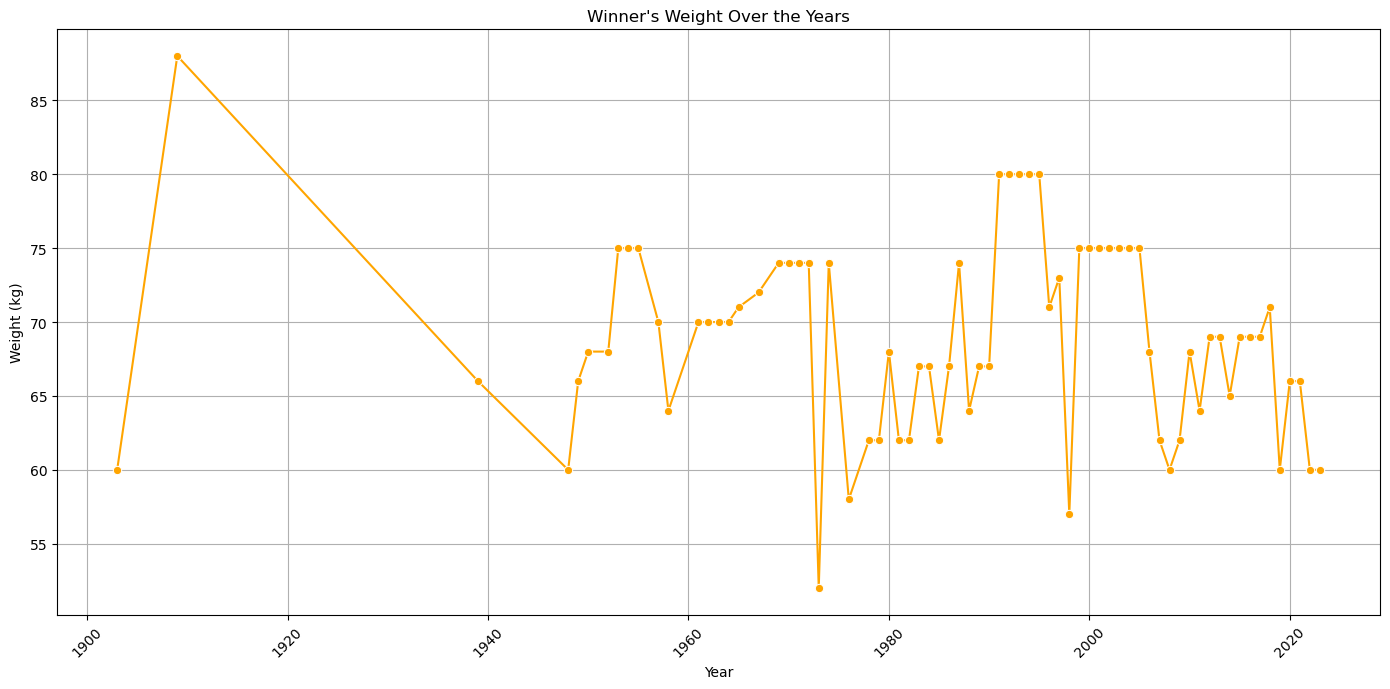

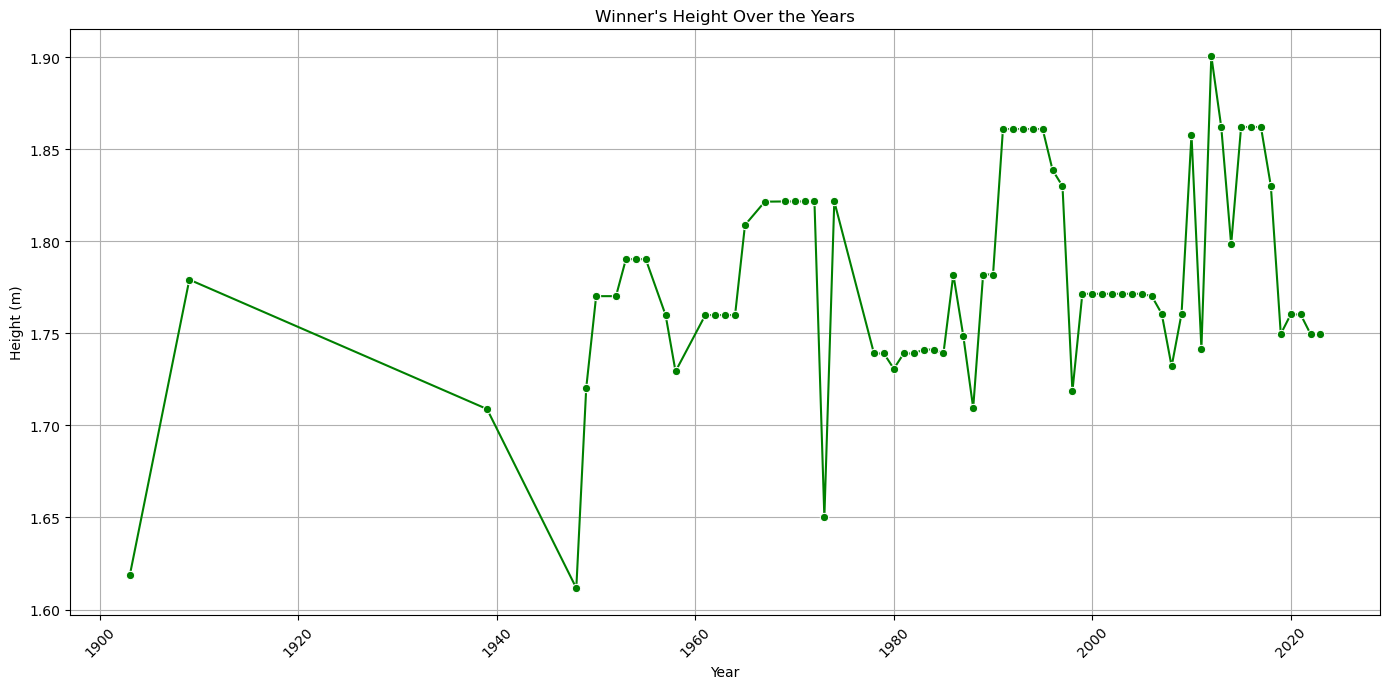

In [23]:
# Plot winner's weight over the years
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='year', y='weight_kg', marker='o', color='orange')
plt.title('Winner\'s Weight Over the Years')
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Plot winner's height over the years
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='year', y='height_m', marker='o', color='green')
plt.title('Winner\'s Height Over the Years')
plt.xlabel('Year')
plt.ylabel('Height (m)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

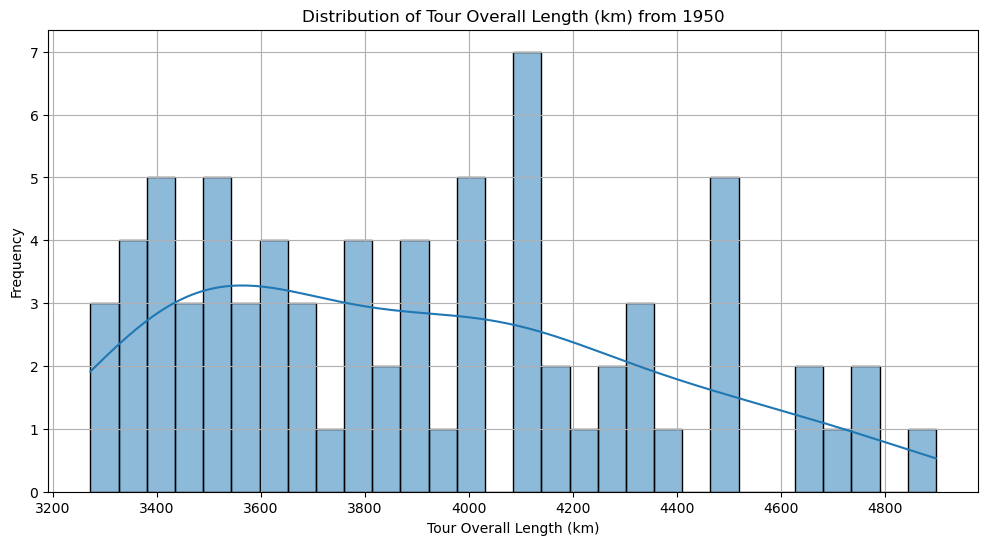

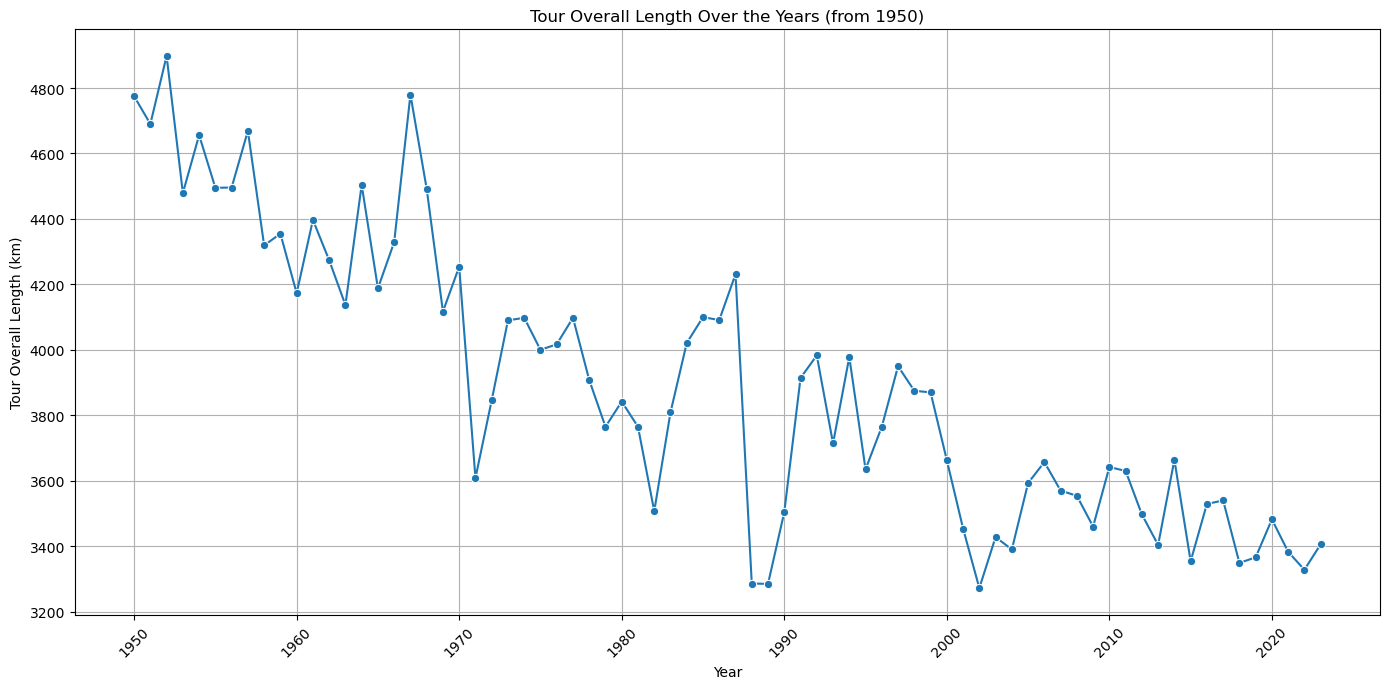

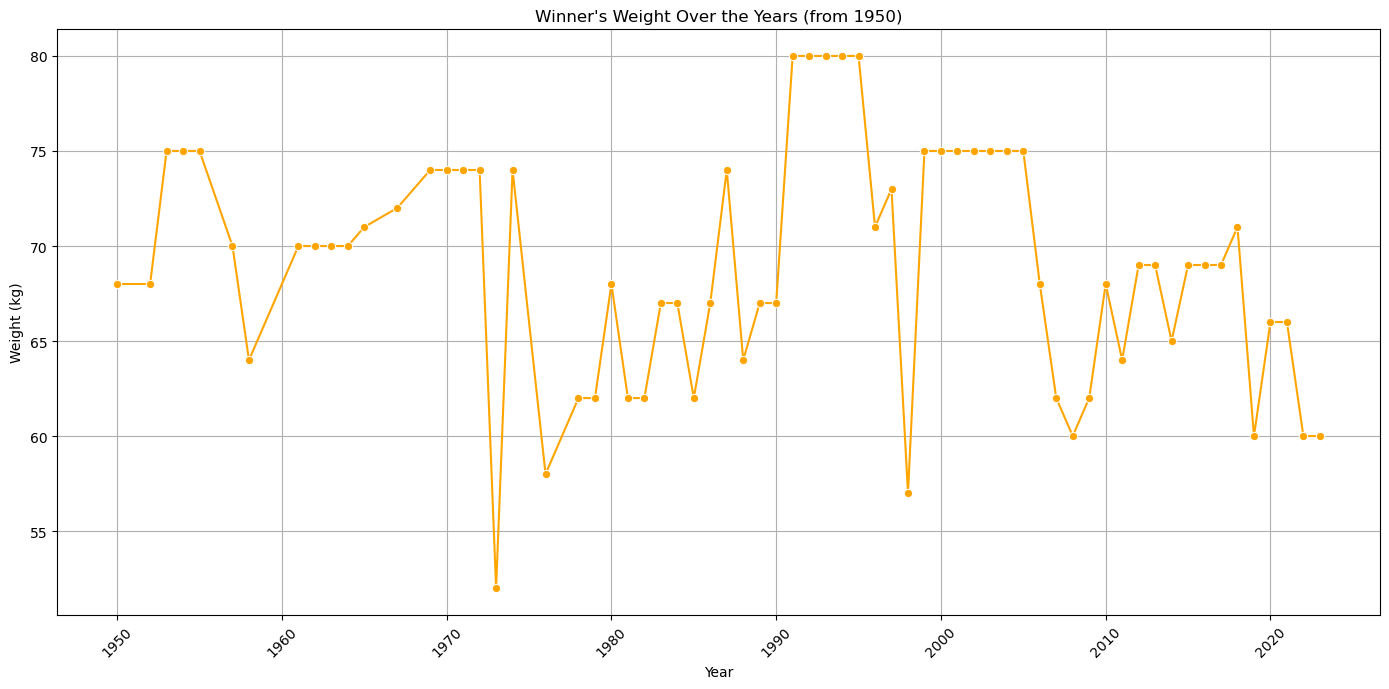

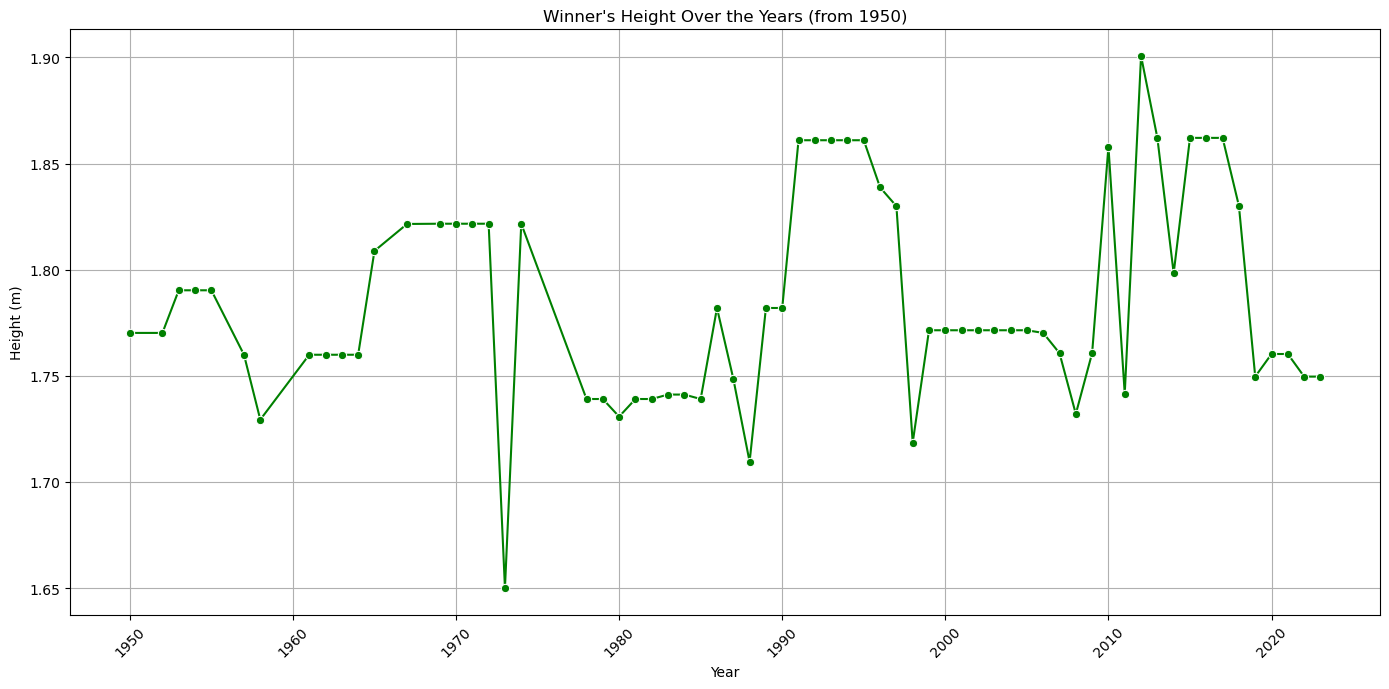

In [24]:
# Filter data from 1950 onwards
merged_df_50s = merged_df[merged_df['year'] >= 1950]
avg_tour_length_50s = avg_tour_length[avg_tour_length['year'] >= 1950]

# Plotting the distribution of stage distances (from 1950)
plt.figure(figsize=(12, 6))
sns.histplot(merged_df_50s['tour_overall_length_km'], bins=30, kde=True)
plt.title('Distribution of Tour Overall Length (km) from 1950')
plt.xlabel('Tour Overall Length (km)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Plot tour overall length over the years (from 1950)
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df_50s, x='year', y='tour_overall_length_km', marker='o')
plt.title('Tour Overall Length Over the Years (from 1950)')
plt.xlabel('Year')
plt.ylabel('Tour Overall Length (km)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Plot winner's weight over the years (from 1950)
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df_50s, x='year', y='weight_kg', marker='o', color='orange')
plt.title('Winner\'s Weight Over the Years (from 1950)')
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Plot winner's height over the years (from 1950)
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df_50s, x='year', y='height_m', marker='o', color='green')
plt.title('Winner\'s Height Over the Years (from 1950)')
plt.xlabel('Year')
plt.ylabel('Height (m)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

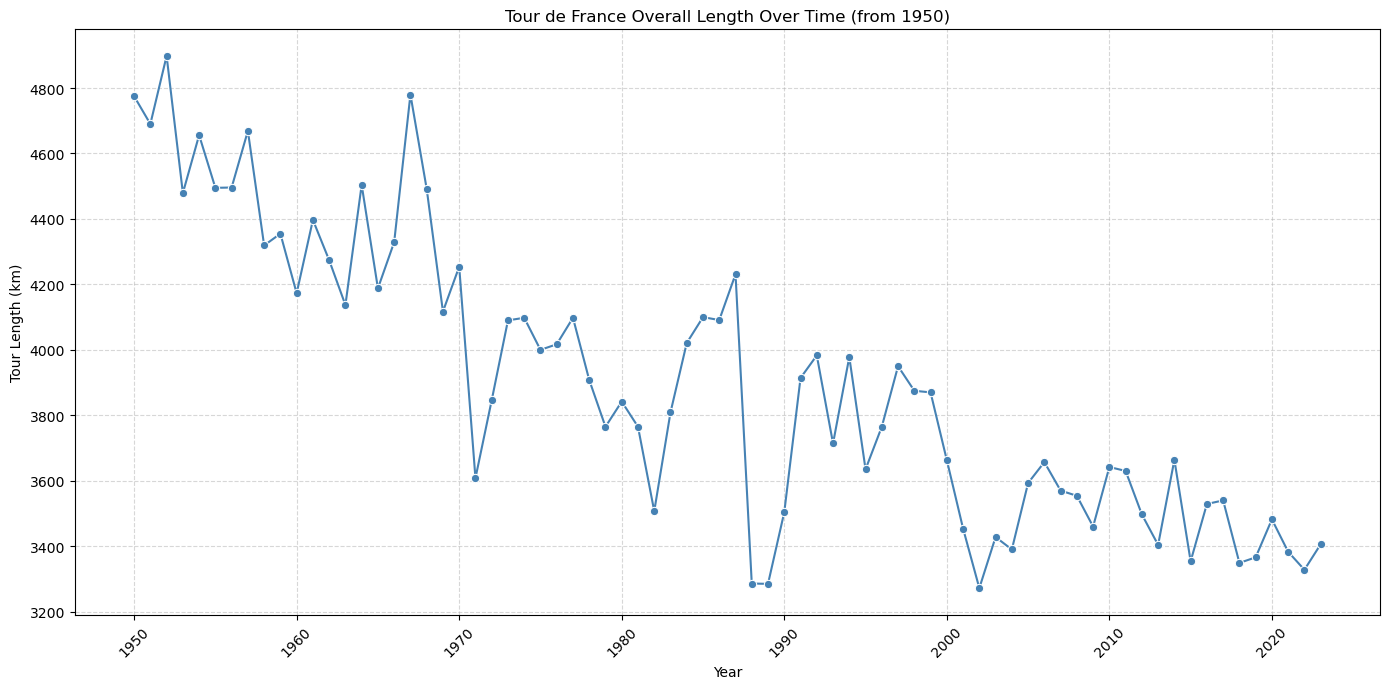

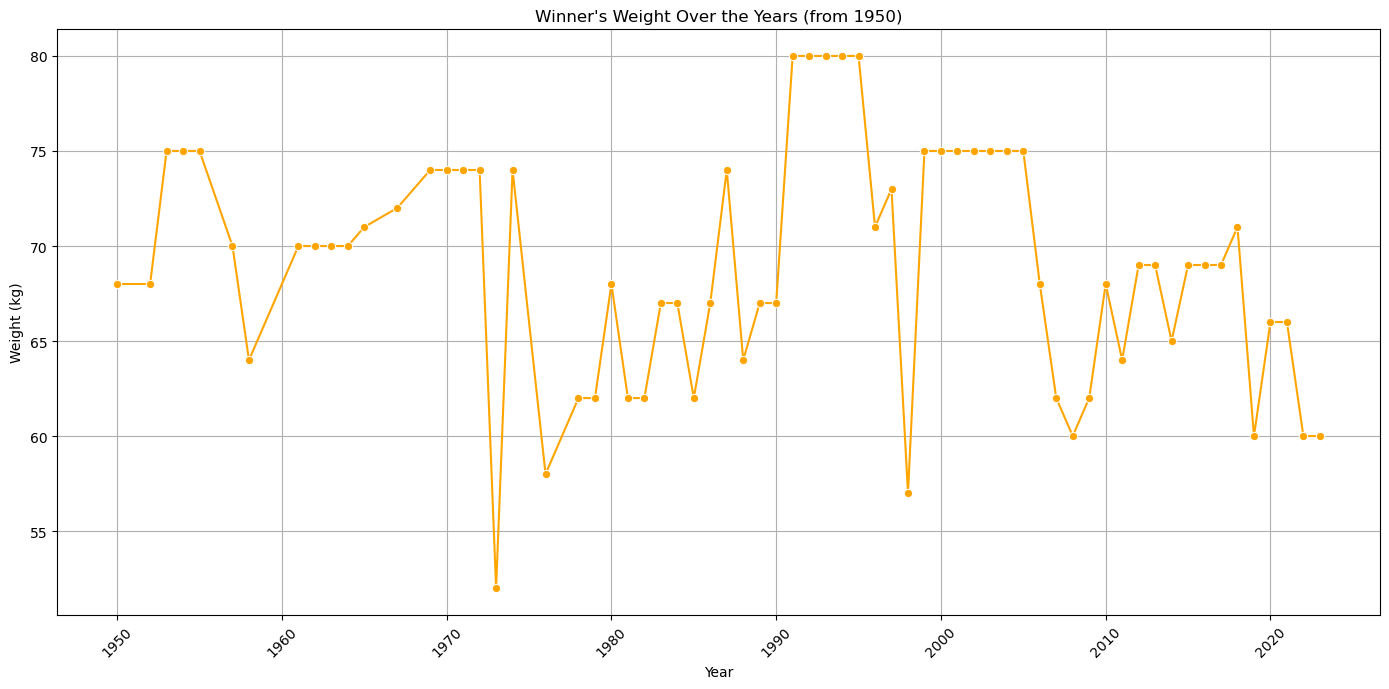

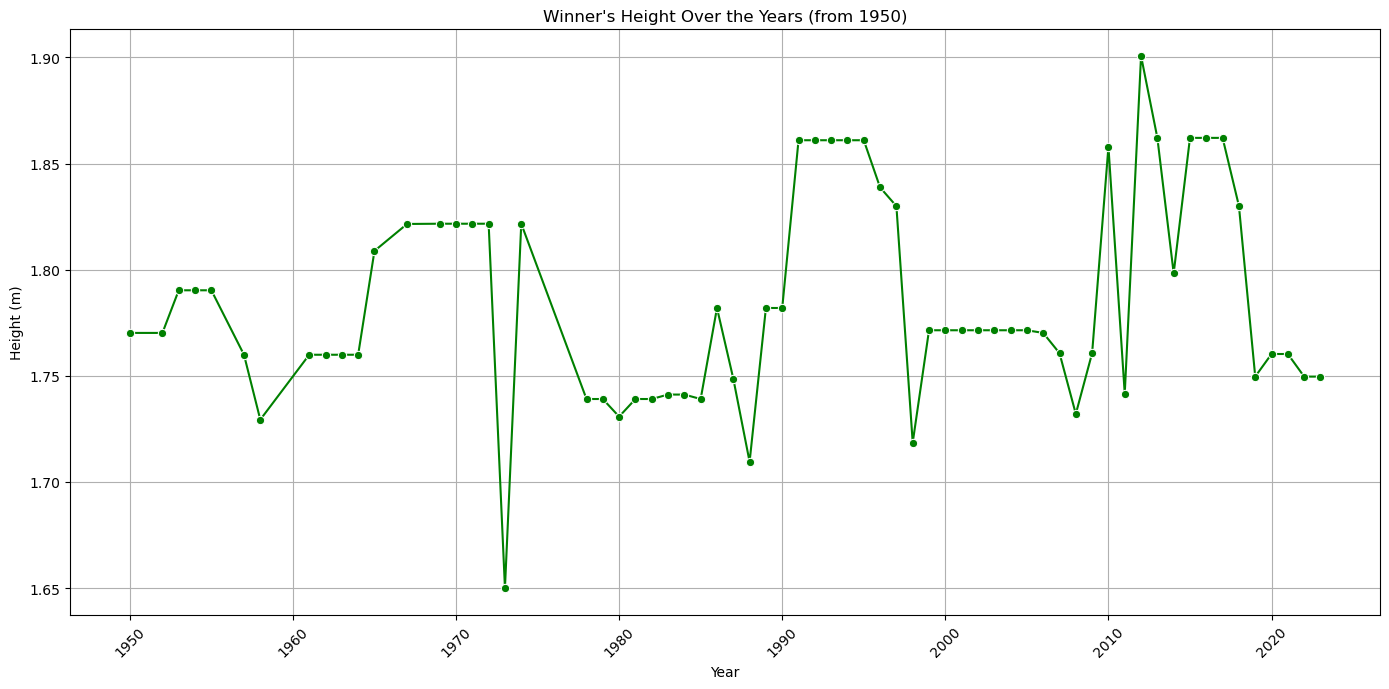

In [30]:
# Filter data from 1950 onwards
merged_df_50s = merged_df[merged_df['year'] >= 1950]
avg_tour_length_50s = avg_tour_length[avg_tour_length['year'] >= 1950]


# Plot average tour length over the years (from 1950)
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_tour_length_50s, x='year', y='tour_overall_length_km', marker='o', color='steelblue')
plt.title('Tour de France Overall Length Over Time (from 1950)')
plt.xlabel('Year')
plt.ylabel('Tour Length (km)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot winner's weight over the years (from 1950)
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df_50s, x='year', y='weight_kg', marker='o', color='orange')
plt.title('Winner\'s Weight Over the Years (from 1950)')
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Plot winner's height over the years (from 1950)
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df_50s, x='year', y='height_m', marker='o', color='green')
plt.title('Winner\'s Height Over the Years (from 1950)')
plt.xlabel('Year')
plt.ylabel('Height (m)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Plot winner's weight from 1970 to 1980
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df[(merged_df['year'] >= 1970) & (merged_df['year'] <= 1980)],
x='year', y='weight_kg', marker='o', color='orange')
plt.title('Winner\'s Weight (1970-1980)')
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
# Plot winner's height from 1970 to 1980
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df[(merged_df['year'] >= 1970) & (merged_df['year'] <= 1980)],
x='year', y='height_m', marker='o', color='green')
plt.title('Winner\'s Height (1970-1980)')
plt.xlabel('Year')
plt.ylabel('Height (m)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
winner_1973 = merged_df[merged_df['year'] == 1973]
winner_1973

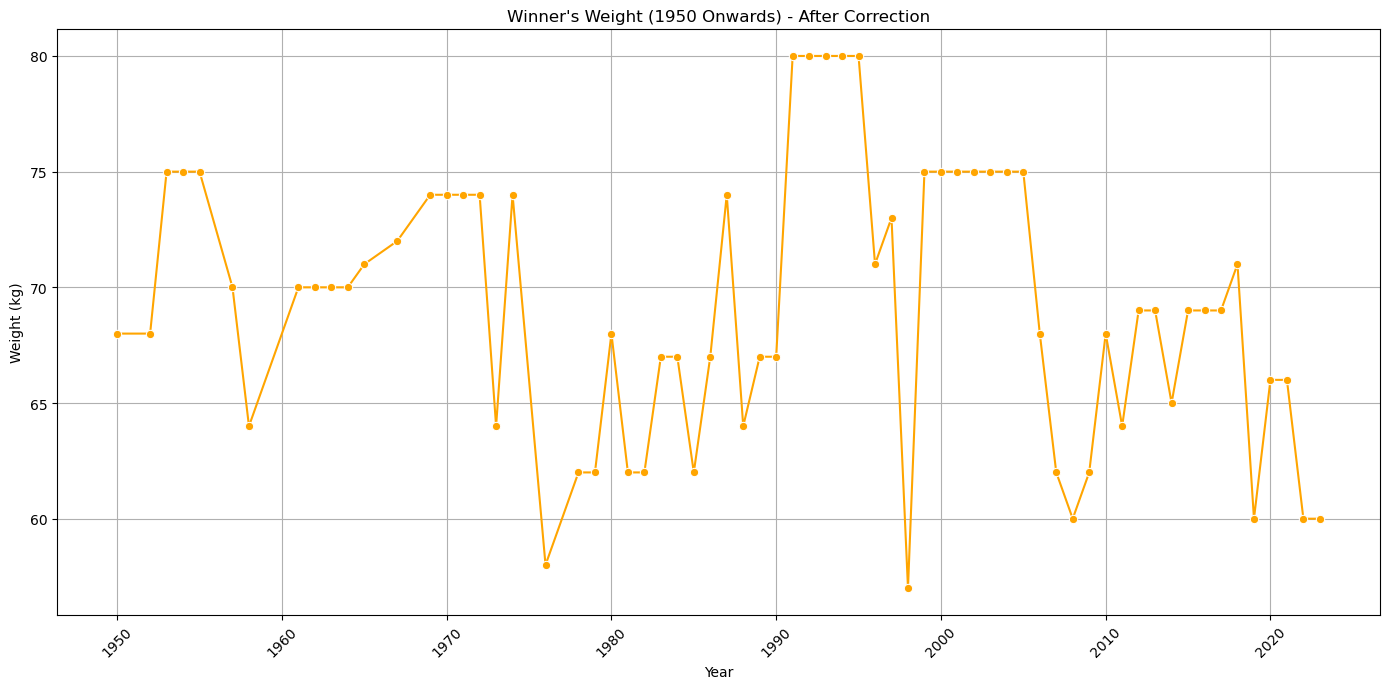

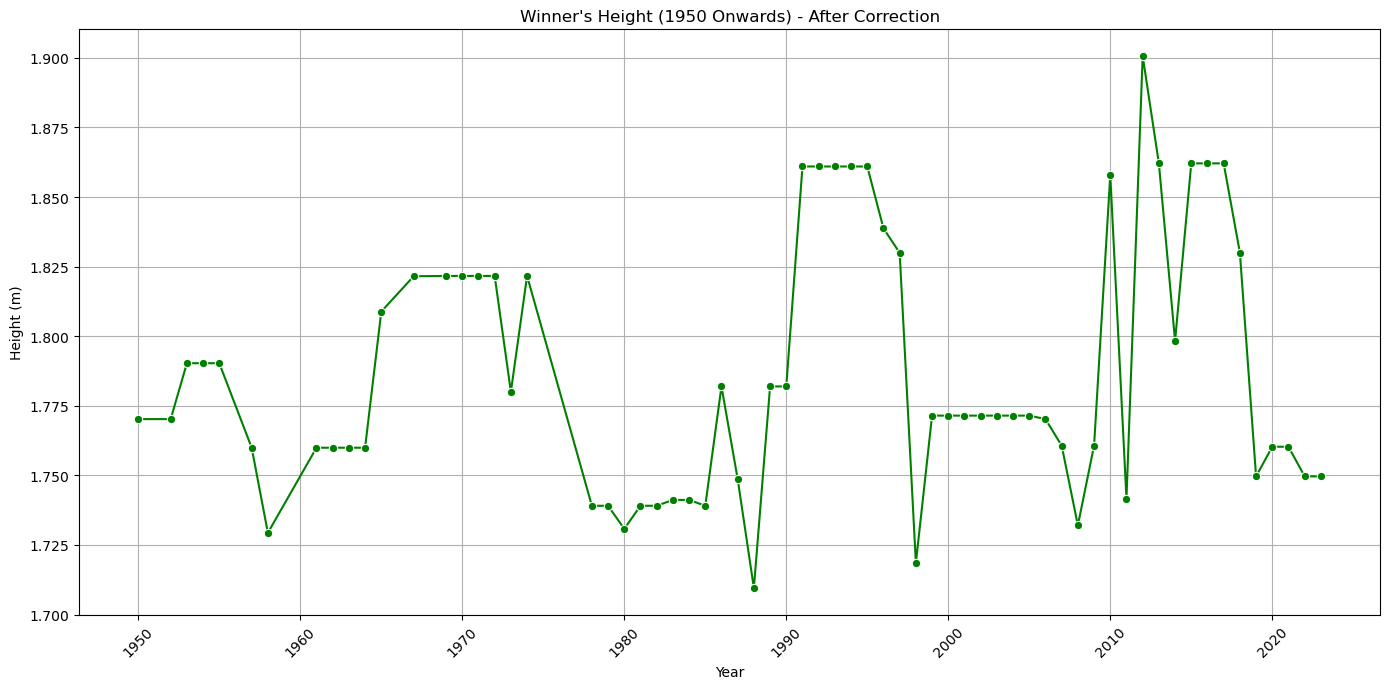

In [31]:
# Correct the value for Luis Ocaña's height and weight
merged_df.loc[merged_df['year'] == 1973, 'height_m'] = 1.78  # Correct height according to Wikipedia
merged_df.loc[merged_df['year'] == 1973, 'weight_kg'] = 64  # Correct weight according to Cycling Hall of Fame

# Re-plot winner's weight from 1950 onwards after correction
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df[(merged_df['year'] >= 1950)],
x='year', y='weight_kg', marker='o', color='orange')
plt.title('Winner\'s Weight (1950 Onwards) - After Correction')
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Re-plot winner's height from 1950 onwards after correction
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df[(merged_df['year'] >= 1950)],
x='year', y='height_m', marker='o', color='green')
plt.title('Winner\'s Height (1950 Onwards) - After Correction')
plt.xlabel('Year')
plt.ylabel('Height (m)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()      


In [32]:
df = merged_df[merged_df['year'] >= 1950].copy()

# Sort by year to be sure
df = df.sort_values('year')

# Create a column that checks if the winner changed compared to the previous year
df['winner_change'] = (df['winner'] != df['winner'].shift(1)).astype(int)

# Create a group ID for each streak of consecutive wins
df['streak_id'] = df['winner_change'].cumsum()

# Calculate streak length for each group
streak_lengths = df.groupby('streak_id').size()

# Map streak length back to the df
df['streak_length'] = df['streak_id'].map(streak_lengths)

# Filter only winners with streaks longer than 2 (i.e., 3 or more consecutive wins)
long_streaks = df[df['streak_length'] >= 3]


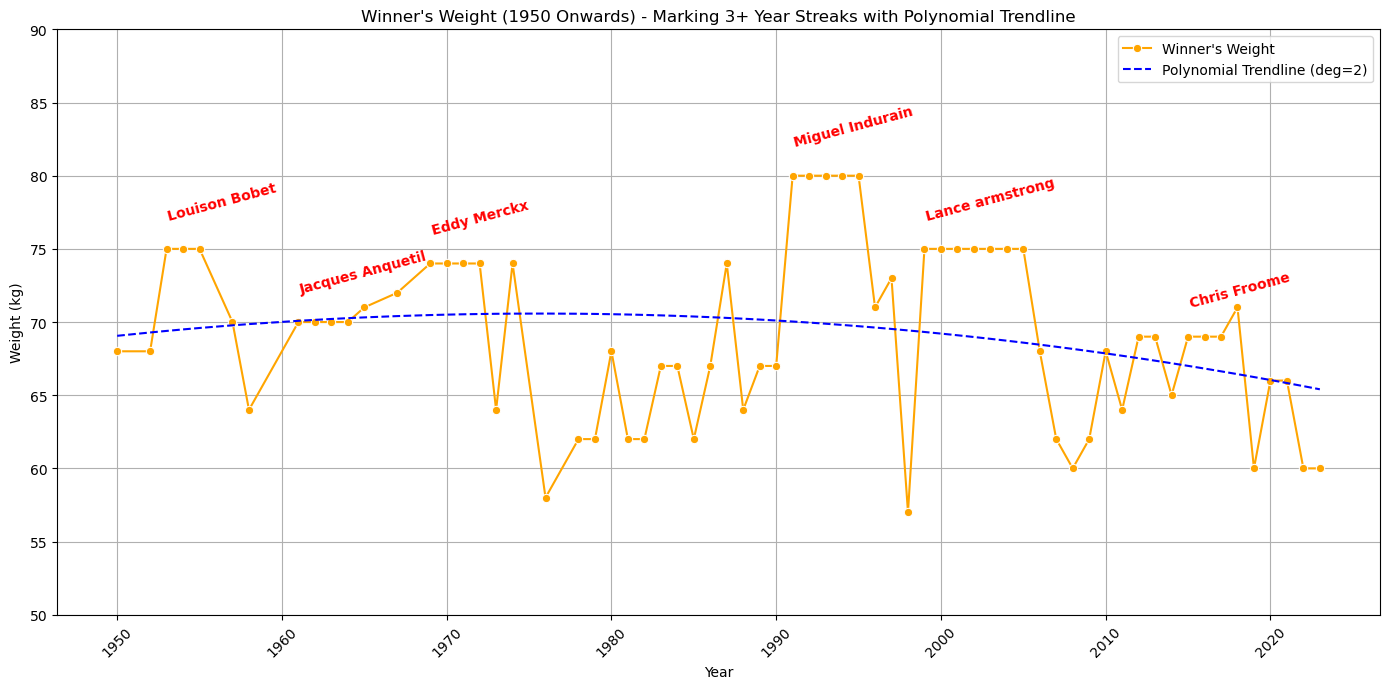

In [33]:
# Plot winner's weight (1950 Onwards) with a polynomial (degree 2) trendline, marking 3+ year streaks
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='year', y='weight_kg', marker='o', color='orange', label="Winner's Weight")

# Fit and plot a degree 2 polynomial trendline
weight_data = df.dropna(subset=['weight_kg'])
z_weight_poly = np.polyfit(weight_data['year'], weight_data['weight_kg'], 2)
p_weight_poly = np.poly1d(z_weight_poly)
plt.plot(
    weight_data['year'],
    p_weight_poly(weight_data['year']),
    color='blue',
    linestyle='--',
    label='Polynomial Trendline (deg=2)'
)

plt.title("Winner's Weight (1950 Onwards) - Marking 3+ Year Streaks with Polynomial Trendline")
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.grid()

max_weight = df['weight_kg'].max()
plt.ylim(50, max_weight + 10)

first_streak_points = long_streaks.groupby('streak_id').first()
for _, row in first_streak_points.iterrows():
    plt.text(row['year'], row['weight_kg'] + 2, row['winner'], fontsize=10, color='red', rotation=15, weight='bold')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Filter df for years 2000 to 2010 and get weight_kg values
weights_2000_2010 = df[(df['year'] >= 2000) & (df['year'] <= 2010)][['year', 'weight_kg']]
weights_2000_2010

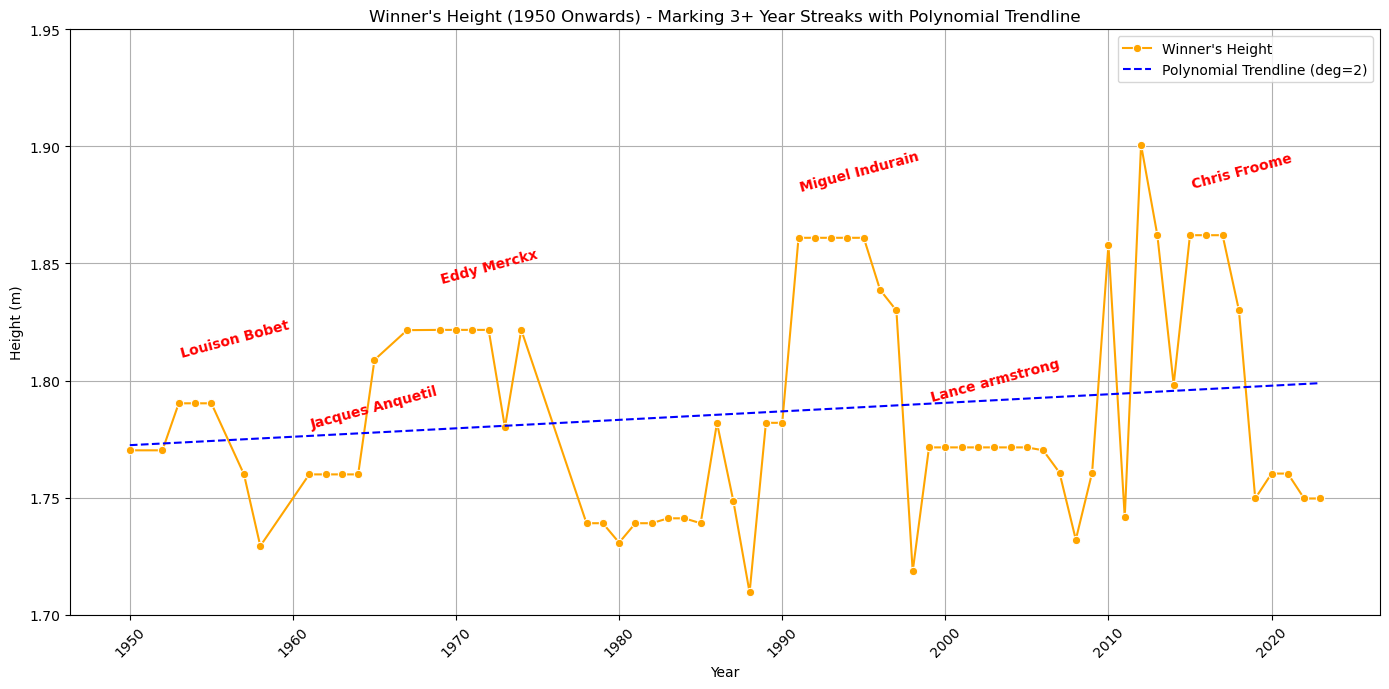

In [35]:
# Plot winner's height (1950 Onwards) with a polynomial (degree 2) trendline, marking 3+ year streaks
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='year', y='height_m', marker='o', color='orange', label="Winner's Height")

# Fit and plot a degree 2 polynomial trendline
height_data = df.dropna(subset=['height_m'])
z_height_poly = np.polyfit(height_data['year'], height_data['height_m'], 2)
p_height_poly = np.poly1d(z_height_poly)
plt.plot(
    height_data['year'],
    p_height_poly(height_data['year']),
    color='blue',
    linestyle='--',
    label='Polynomial Trendline (deg=2)'
)

plt.title("Winner's Height (1950 Onwards) - Marking 3+ Year Streaks with Polynomial Trendline")
plt.xlabel('Year')
plt.ylabel('Height (m)')
plt.xticks(rotation=45)
plt.grid()

plt.ylim(1.70, 1.95)

first_streak_points = long_streaks.groupby('streak_id').first()
for _, row in first_streak_points.iterrows():
    plt.text(row['year'], row['height_m'] + 0.02, row['winner'], fontsize=10, color='red', rotation=15, weight='bold')

plt.legend()
plt.tight_layout()
plt.show()

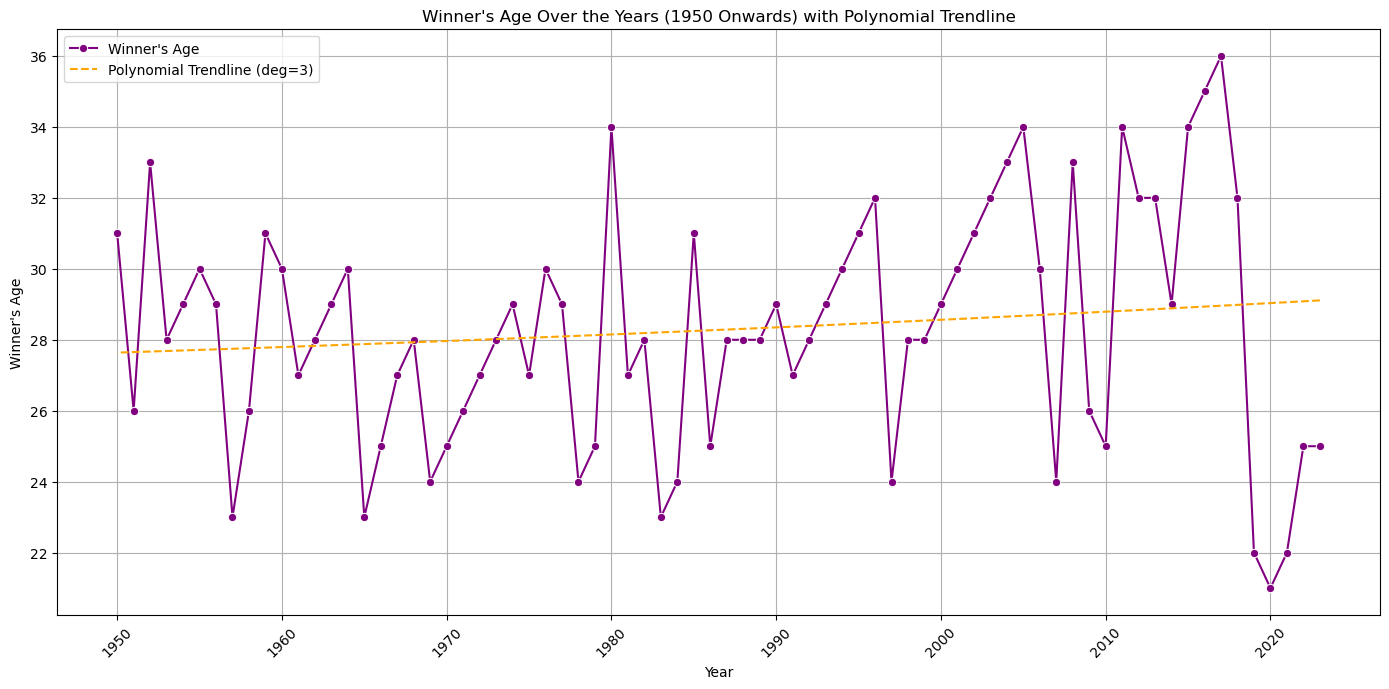

In [36]:
# Plot the winner's age over the years from 1950 onwards with a polynomial (degree 2) trendline
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df[merged_df['year'] >= 1950], x='year', y='age', marker='o', color='purple', label="Winner's Age")

# Polynomial (degree 2) trendline
age_data = merged_df[merged_df['year'] >= 1950].dropna(subset=['age'])
z_age_poly = np.polyfit(age_data['year'], age_data['age'], 2)
p_age_poly = np.poly1d(z_age_poly)

# Plot the polynomial trendline
plt.plot(
    age_data['year'],
    p_age_poly(age_data['year']),
    color='orange',
    linestyle='--',
    label='Polynomial Trendline (deg=3)'
)

plt.title("Winner's Age Over the Years (1950 Onwards) with Polynomial Trendline")
plt.xlabel('Year')
plt.ylabel("Winner's Age")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

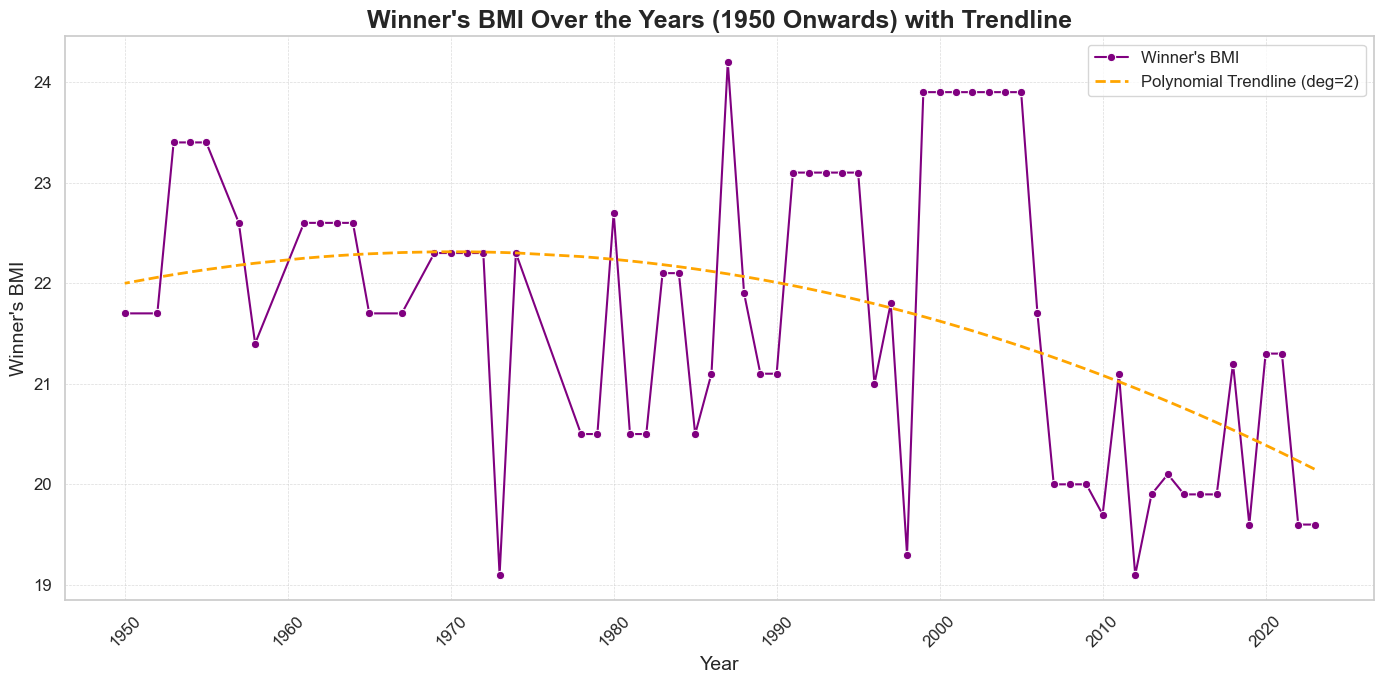

In [37]:
# Prepare data for BMI trendline (remove NaNs)
bmi_data = merged_df[(merged_df['year'] >= 1950) & merged_df['bmi'].notnull() & merged_df['year'].notnull()]

# Plot the winner's BMI over the years from 1950 onwards with a trendline
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")  # Optional: gives a cleaner background

sns.lineplot(
    data=merged_df[merged_df['year'] >= 1950],
    x='year',
    y='bmi',
    marker='o',
    color='purple',
    label="Winner's BMI"
)

# Polynomial (degree 2) trendline
z_bmi_poly = np.polyfit(bmi_data['year'], bmi_data['bmi'], 2)
p_bmi_poly = np.poly1d(z_bmi_poly)

# Plot the polynomial trendline
plt.plot(
    bmi_data['year'],
    p_bmi_poly(bmi_data['year']),
    color='orange',
    linestyle='--',
    linewidth=2,
    label='Polynomial Trendline (deg=2)'
)

# Enhanced grid
plt.grid(
    True,
    which='both',         # both major and minor ticks
    linestyle='--',
    linewidth=0.5,
    alpha=0.7
)

plt.title("Winner's BMI Over the Years (1950 Onwards) with Trendline", fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel("Winner's BMI", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [41]:
merged_df

year        bmi
0   1950  19.395137
1   1951  19.892202
2   1952  19.029219
3   1953  20.421335
4   1954  20.317443
..   ...        ...
69  2019  20.547963
70  2020  20.457399
71  2021  18.149082
72  2022  18.105449
73  2023  18.202197

[74 rows x 2 columns]

In [42]:
merged_df = df_merged.copy()

In [43]:
merged_df

year  tour_no               winner   country               team  \
0    2023      110     Jonas Vingegaard   Denmark   Team Jumbo Visma   
1    2022      109     Jonas Vingegaard   Denmark   Team Jumbo Visma   
2    2021      108        Tadej Pogacar  Slovenia  UAE Team Emirates   
3    2020      107        Tadej Pogacar  Slovenia  UAE Team Emirates   
4    2019      106          Egan Bernal  Colombia        Team Ineos    
..    ...      ...                  ...       ...                ...   
105  1907        5  Lucien Petit-Breton    France     Cycles Peugeot   
106  1906        4         Rene Pottier    France     Cycles Peugeot   
107  1905        3    Louis Trousselier    France     Cycles Peugeot   
108  1904        2        Henri Cornet     France          Cycles JC   
109  1903        1        Maurice Garin    France       La Francaise   

     tour_overall_length_km  age   bmi  weight_kg  height_m rider_type_(pps)  \
0                    3406.0   25  19.6       60.0  1.749636          climber   
1                    3328.0   25  19.6       60.0  1.749636          climber   
2                    3383.0   22  21.3       66.0  1.760282          climber   
3                    3482.0   21  21.3       66.0  1.760282          climber   
4                    3366.0   22  19.6       60.0  1.749636          climber   
..                      ...  ...   ...        ...       ...              ...   
105                     NaN   24   NaN        NaN       NaN          climber   
106                  4637.0   27   NaN        NaN       NaN          climber   
107                  2994.0   24   NaN        NaN       NaN          climber   
108                  2428.0   19   NaN        NaN       NaN          climber   
109                  2428.0   32  22.9       60.0  1.618668         sprinter   

    close_rider_type_(pps)  pre_tour_gc_wins  pre_tour_wins  \
0                      NaN                 3             11   
1                      NaN                 0              2   
2                      NaN                 3              4   
3                      NaN                 1              4   
4                      NaN                 2              1   
..                     ...               ...            ...   
105                    NaN                 0              2   
106                    NaN                 0              0   
107                    NaN                 0              2   
108                    NaN                 0              0   
109                    NaN                 0              1   

     total_completed_stage_races  total_completed_day_races  gt_wins  \
0                              5                          1        1   
1                              4                          7        0   
2                              4                          7        1   
3                              3                          6        0   
4                              4                          7        0   
..                           ...                        ...      ...   
105                            0                          3        0   
106                            0                          1        0   
107                            0                          2        0   
108                            0                          1        0   
109                            0                          1        0   

     nat_tt_wins  nat_rr_wins  worlds_rr_wins  
0              0            0               0  
1              0            0               0  
2              1            1               0  
3              1            1               0  
4              0            0               0  
..           ...          ...             ...  
105            0            0               0  
106            0            0               0  
107            0            0               0  
108            0            0               0  
109            0            0

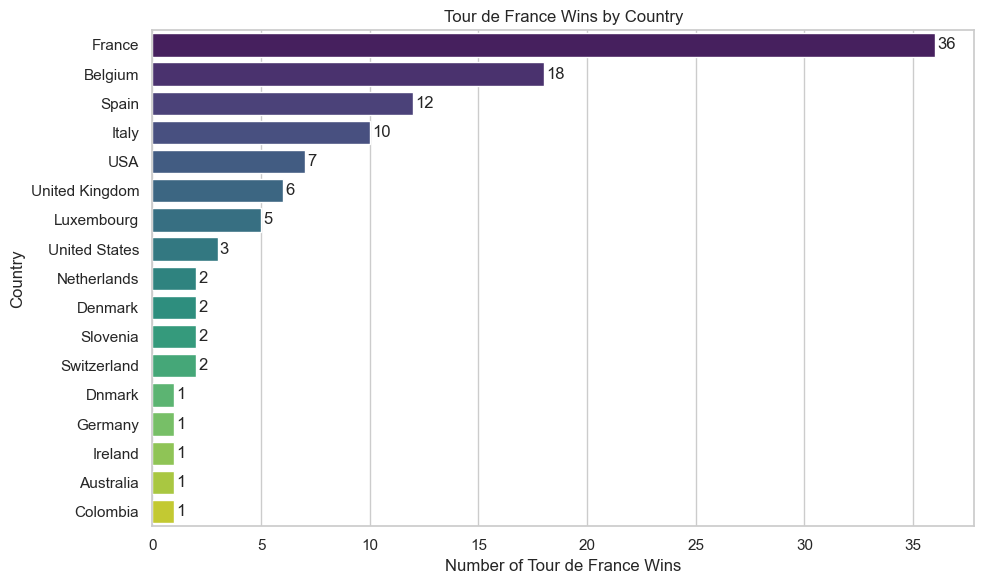

In [44]:
# Count wins per country
wins_per_country = merged_df['country'].value_counts()

plt.figure(figsize=(10, 6))
palette = sns.color_palette("viridis", len(wins_per_country))
ax = sns.barplot(
    x=wins_per_country.values,
    y=wins_per_country.index,
    hue=wins_per_country.index,  # Use index as hue to color by country
    legend=False,  # Hide legend since hue = y
    dodge=False,  # Avoid dodging since we want a single bar per country
    palette=palette
)

# Add labels on the bars
for i, value in enumerate(wins_per_country.values):
    ax.text(value + 0.1, i, str(value), va='center')

plt.xlabel('Number of Tour de France Wins')
plt.ylabel('Country')
plt.title('Tour de France Wins by Country')
plt.tight_layout()
plt.show()


C:\Users\raclo\AppData\Local\Temp\ipykernel_40956\2791369531.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_riders, x='Victories', y='Winner', palette='crest')


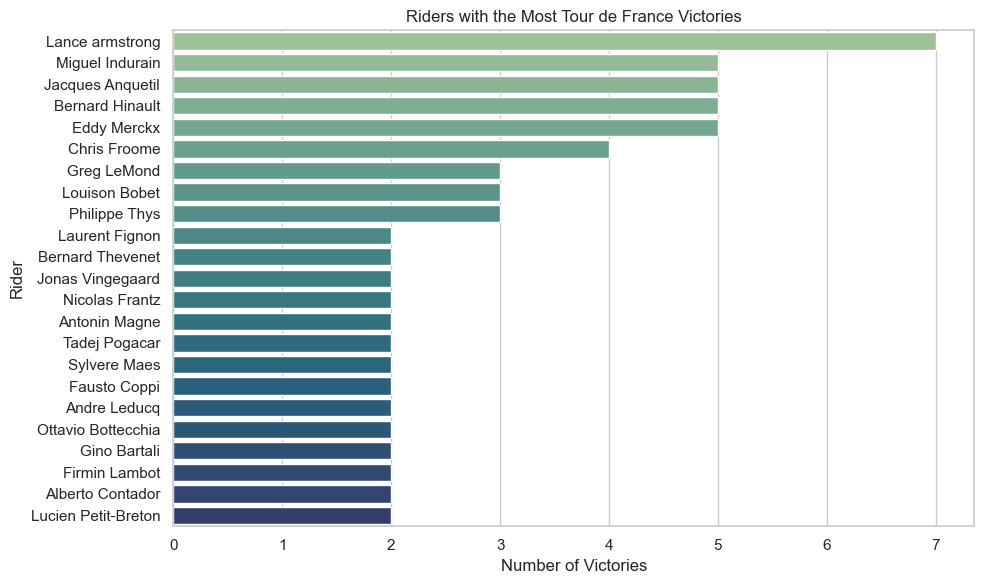

In [45]:
# Count the number of victories per rider
victories_per_rider = merged_df['winner'].value_counts().reset_index()
victories_per_rider.columns = ['Winner', 'Victories']

# Filter riders with more than 1 victory
top_riders = victories_per_rider[victories_per_rider['Victories'] > 1]

plt.figure(figsize=(10, 6))
sns.barplot(data=top_riders, x='Victories', y='Winner', palette='crest')
plt.xlabel('Number of Victories')
plt.ylabel('Rider')
plt.title('Riders with the Most Tour de France Victories')
plt.tight_layout()
plt.show()

C:\Users\raclo\AppData\Local\Temp\ipykernel_40956\3690075419.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_riders, x='Victories', y='Winner', palette='crest')


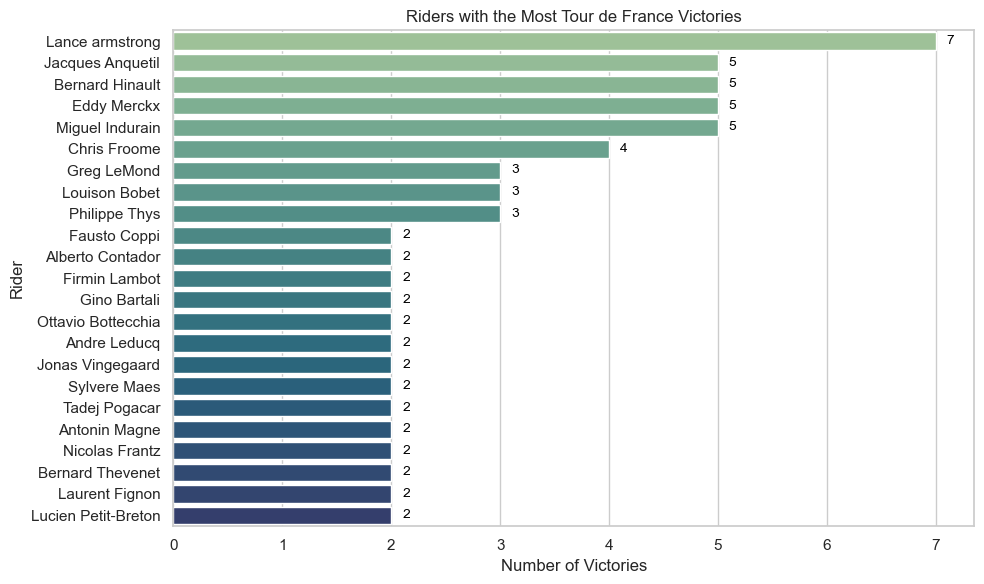

In [46]:
# Count the number of victories per rider
victories_per_rider = merged_df['winner'].value_counts().reset_index()
victories_per_rider.columns = ['Winner', 'Victories']

# Filter riders with more than 1 victory
top_riders = victories_per_rider[victories_per_rider['Victories'] > 1].sort_values('Victories', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_riders, x='Victories', y='Winner', palette='crest')

# Add value labels
for bar in ax.patches:
    width = bar.get_width()
    plt.text(
        width + 0.1,                        # x position (a bit to the right of the bar)
        bar.get_y() + bar.get_height() / 2, # y position (middle of the bar)
        int(width),                         # the label (number of victories)
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )

# Styling
plt.xlabel('Number of Victories')
plt.ylabel('Rider')
plt.title('Riders with the Most Tour de France Victories')
plt.tight_layout()
plt.show()

In [47]:
# Group years per winner
rider_victory_years = merged_df.groupby('winner')['year'].apply(list).to_dict()


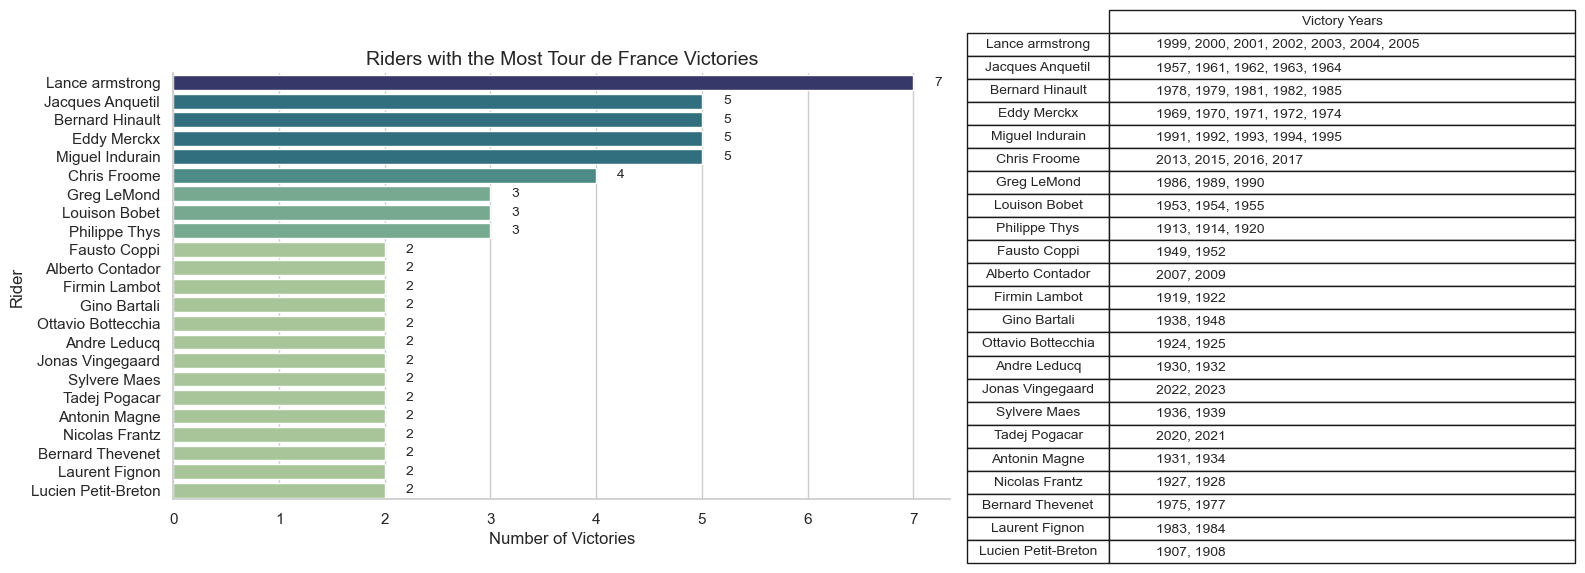

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.gridspec as gridspec

# Count victories
victories_per_rider = merged_df['winner'].value_counts().reset_index()
victories_per_rider.columns = ['Winner', 'Victories']

# Filter for riders with more than 1 win
top_riders = victories_per_rider[victories_per_rider['Victories'] > 1].sort_values('Victories', ascending=False)

# Add years of victory
rider_years = merged_df.groupby('winner')['year'].apply(list)
top_riders['Years'] = top_riders['Winner'].map(rider_years)
top_riders['Years'] = top_riders['Years'].apply(lambda years: ', '.join(map(str, sorted(years))))

# Create figure with gridspec layout
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])  # Left plot 2x wider than table

# Plot barplot
ax0 = plt.subplot(gs[0])
sns.barplot(data=top_riders, x='Victories', y='Winner', hue='Victories', palette='crest', legend=False, ax=ax0)

# Add value labels to bars
for bar in ax0.patches:
    width = bar.get_width()
    ax0.text(width + 0.2, bar.get_y() + bar.get_height() / 2,
             f"{int(width)}", va='center', ha='left', fontsize=10)

# Styling
ax0.set_title('Riders with the Most Tour de France Victories', fontsize=14)
ax0.set_xlabel('Number of Victories')
ax0.set_ylabel('Rider')
sns.despine(ax=ax0)

# Plot external table
ax1 = plt.subplot(gs[1])
ax1.axis('off')

table_data = top_riders[['Winner', 'Years']].set_index('Winner')
table = ax1.table(
    cellText=table_data.values,
    rowLabels=table_data.index,
    colLabels=['Victory Years'],
    cellLoc='left',
    rowLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.tight_layout()
plt.show()


C:\Users\raclo\AppData\Local\Temp\ipykernel_40956\325143000.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


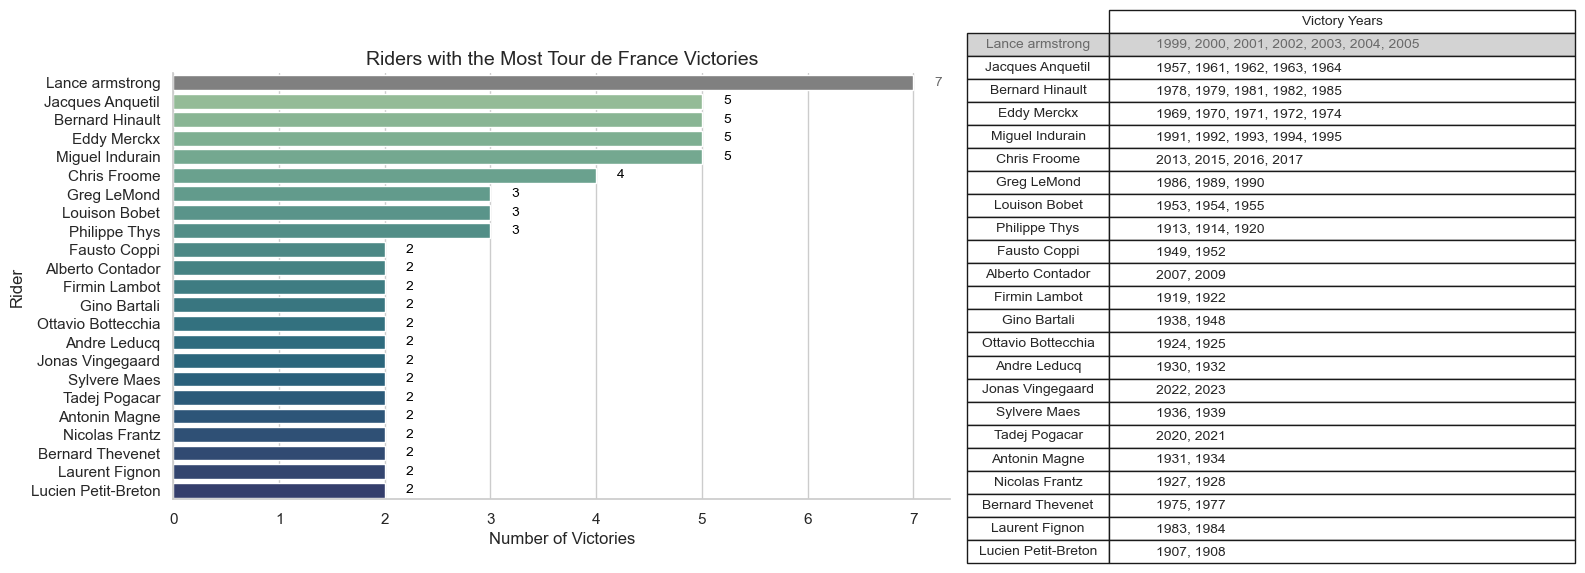

In [49]:
import matplotlib.colors as mcolors

# Copy top_riders to avoid modifying original
top_riders_mod = top_riders.copy()

# Find Lance Armstrong's index
armstrong_idx = top_riders_mod[top_riders_mod['Winner'].str.lower() == 'lance armstrong'].index[0]

# Set up colors: all bars crest, except Armstrong (grey)
bar_colors = ['grey' if i == armstrong_idx else c for i, c in enumerate(sns.color_palette('crest', len(top_riders_mod)))]

fig = plt.figure(figsize=(16, 6))
gs = plt.GridSpec(1, 2, width_ratios=[2, 1])

# Barplot
ax0 = plt.subplot(gs[0])
bars = sns.barplot(
    data=top_riders_mod,
    x='Victories',
    y='Winner',
    palette=bar_colors,
    ax=ax0
)

# Add value labels, Armstrong in dimgray
for i, bar in enumerate(ax0.patches):
    width = bar.get_width()
    color = 'dimgray' if i == armstrong_idx else 'black'
    ax0.text(
        width + 0.2,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width)}",
        va='center',
        ha='left',
        fontsize=10,
        color=color
    )

ax0.set_title('Riders with the Most Tour de France Victories', fontsize=14)
ax0.set_xlabel('Number of Victories')
ax0.set_ylabel('Rider')
sns.despine(ax=ax0)

# Table
ax1 = plt.subplot(gs[1])
ax1.axis('off')
table_data = top_riders_mod[['Winner', 'Years']].set_index('Winner')
table = ax1.table(
    cellText=table_data.values,
    rowLabels=table_data.index,
    colLabels=['Victory Years'],
    cellLoc='left',
    rowLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# Grey out Armstrong's row in the table
for (row, col), cell in table.get_celld().items():
    if row == armstrong_idx + 1:  # +1 because row 0 is header
        cell.set_facecolor('lightgrey')
        cell.set_text_props(color='dimgray')

plt.tight_layout()
plt.show()

In [ ]:
merged_df.head()

In [50]:
# Remove leading/trailing blanks in rider type columns
merged_df['rider_type_(pps)'] = merged_df['rider_type_(pps)'].str.strip()
if 'close_rider_type_(pps)' in merged_df.columns:
    merged_df['close_rider_type_(pps)'] = merged_df['close_rider_type_(pps)'].str.strip()

C:\Users\raclo\AppData\Local\Temp\ipykernel_40956\2840237026.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rider_type_counts, x='Rider Type', y='Count', palette='viridis')


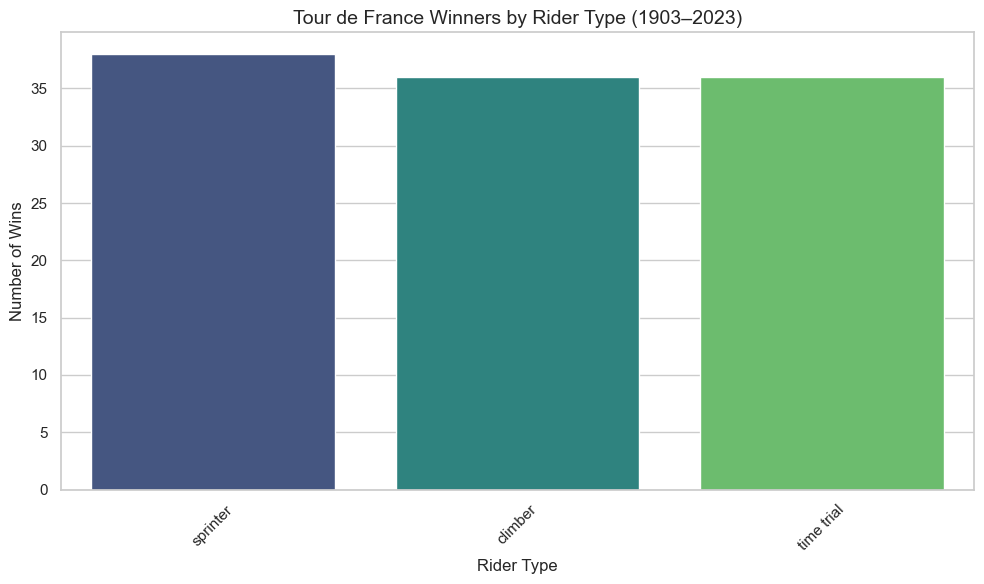

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nicer style
sns.set(style="whitegrid")

# Count winners by rider type
rider_type_counts = merged_df['rider_type_(pps)'].value_counts().reset_index()
rider_type_counts.columns = ['Rider Type', 'Count']

# Sort for cleaner display
rider_type_counts = rider_type_counts.sort_values('Count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=rider_type_counts, x='Rider Type', y='Count', palette='viridis')

plt.title('Tour de France Winners by Rider Type (1903–2023)', fontsize=14)
plt.xlabel('Rider Type')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


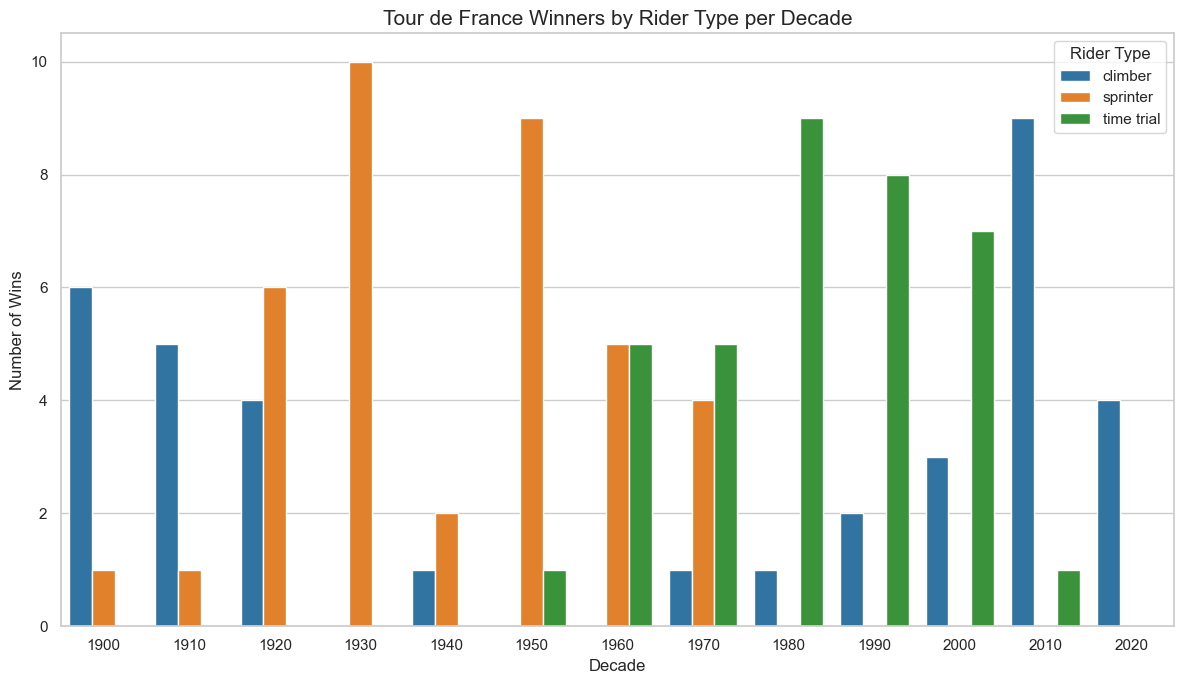

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Create a 'decade' column
merged_df['decade'] = (merged_df['year'] // 10) * 10

# Step 2: Group by decade and rider type
grouped = merged_df.groupby(['decade', 'rider_type_(pps)']).size().reset_index(name='count')

# Step 3: Plot
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")
sns.barplot(data=grouped, x='decade', y='count', hue='rider_type_(pps)', palette='tab10')

plt.title('Tour de France Winners by Rider Type per Decade', fontsize=15)
plt.xlabel('Decade')
plt.ylabel('Number of Wins')
plt.legend(title='Rider Type')
plt.tight_layout()
plt.show()


In [54]:
def assign_era(year):
    if year <= 1939:
        return 'Early Years (1903–1939)'
    elif 1947 <= year <= 1969:
        return 'Post-War Era (1947–1969)'
    elif 1970 <= year <= 1975:
        return 'Merckx Era (1970–1975)'
    elif 1976 <= year <= 1998:
        return 'Modernization Era (1976–1998)'
    elif 1999 <= year <= 2010:
        return 'Doping Era (1999–2010)'
    elif year >= 2011:
        return 'Post-Doping Era (2011–today)'
    else:
        return 'No Tour'  # For missing war years

# Apply the function
merged_df['era'] = merged_df['year'].apply(assign_era)


In [55]:
merged_df['era'].value_counts()


era
Early Years (1903–1939)          33
Modernization Era (1976–1998)    23
Post-War Era (1947–1969)         23
Post-Doping Era (2011–today)     13
Doping Era (1999–2010)           12
Merckx Era (1970–1975)            6
Name: count, dtype: int64

C:\Users\raclo\AppData\Local\Temp\ipykernel_40956\1373034365.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby(['era', 'rider_type_(pps)'])


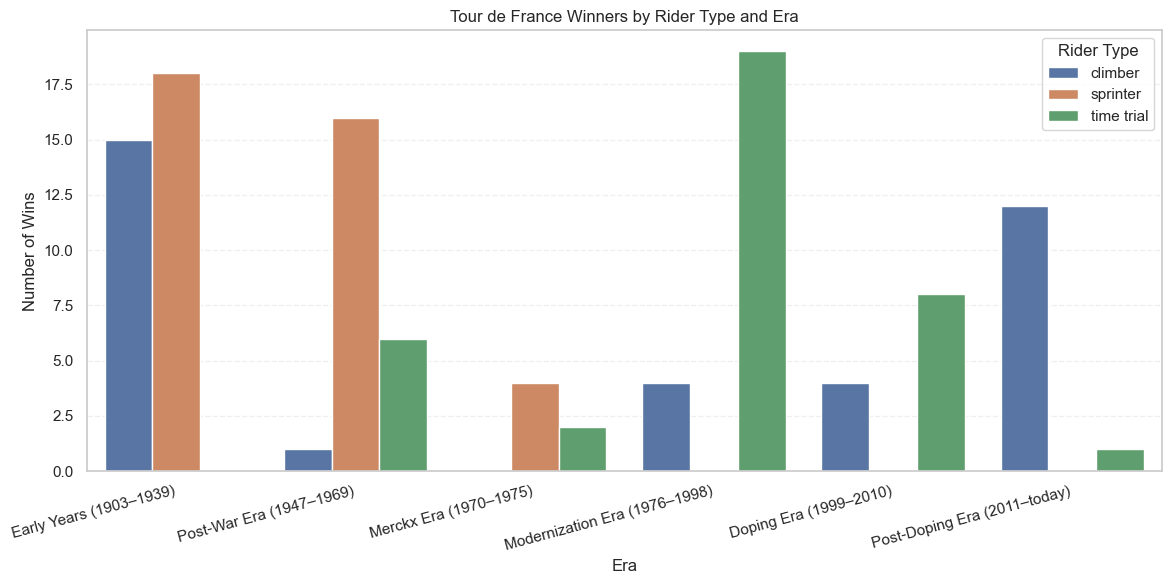

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the order of eras
era_order = [
    'Early Years (1903–1939)',
    'Post-War Era (1947–1969)',
    'Merckx Era (1970–1975)',
    'Modernization Era (1976–1998)',
    'Doping Era (1999–2010)',
    'Post-Doping Era (2011–today)'
]

# Convert 'era' to ordered categorical
merged_df['era'] = pd.Categorical(merged_df['era'], categories=era_order, ordered=True)

# Group the data
era_rider_counts = (
    merged_df.groupby(['era', 'rider_type_(pps)'])
    .size()
    .reset_index(name='count')
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=era_rider_counts,
    x='era',
    y='count',
    hue='rider_type_(pps)'
)

plt.title('Tour de France Winners by Rider Type and Era')
plt.xlabel('Era')
plt.ylabel('Number of Wins')
plt.xticks(rotation=15, ha='right')  # Rotate and right-align
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Rider Type')
plt.tight_layout()
plt.show()


C:\Users\raclo\AppData\Local\Temp\ipykernel_40956\41771542.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby(['era', 'rider_type_(pps)'])


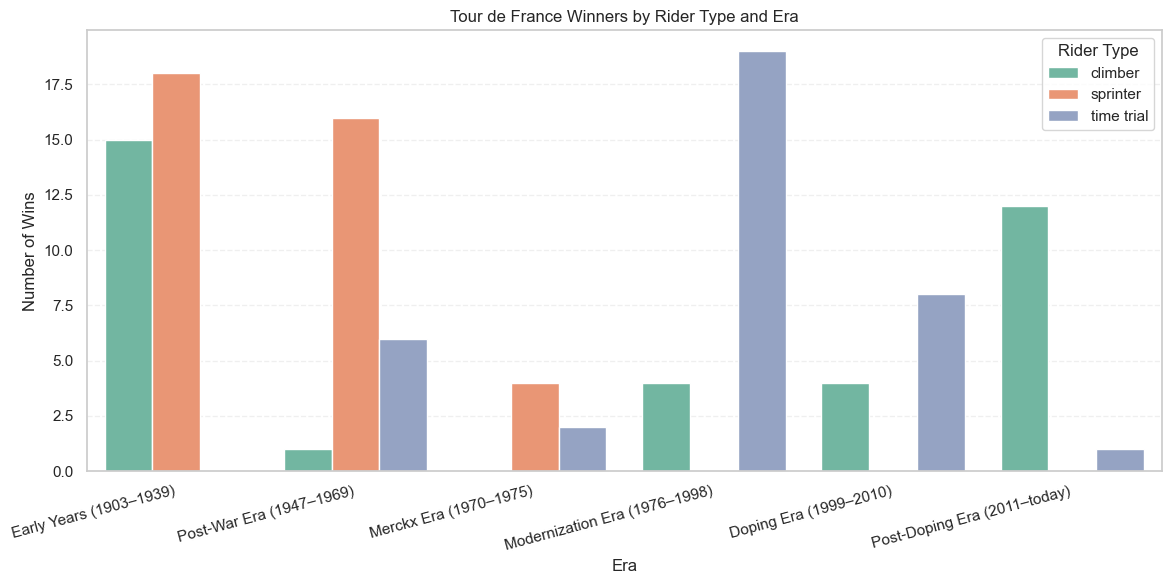

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define era order
era_order = [
    'Early Years (1903–1939)',
    'Post-War Era (1947–1969)',
    'Merckx Era (1970–1975)',
    'Modernization Era (1976–1998)',
    'Doping Era (1999–2010)',
    'Post-Doping Era (2011–today)'
]

# Convert to categorical with ordering
merged_df['era'] = pd.Categorical(merged_df['era'], categories=era_order, ordered=True)

# Count wins per rider type and era
era_rider_counts = (
    merged_df.groupby(['era', 'rider_type_(pps)'])
    .size()
    .reset_index(name='count')
)

# Choose a color palette (you can try "Set2", "Set3", "Dark2", or define manually)
custom_palette = sns.color_palette("Set2", n_colors=era_rider_counts['rider_type_(pps)'].nunique())

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=era_rider_counts,
    x='era',
    y='count',
    hue='rider_type_(pps)',
    palette=custom_palette
)

plt.title('Tour de France Winners by Rider Type and Era')
plt.xlabel('Era')
plt.ylabel('Number of Wins')
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Rider Type')
plt.tight_layout()
plt.show()


C:\Users\raclo\AppData\Local\Temp\ipykernel_40956\1835091468.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['era', 'rider_type_(pps)'])


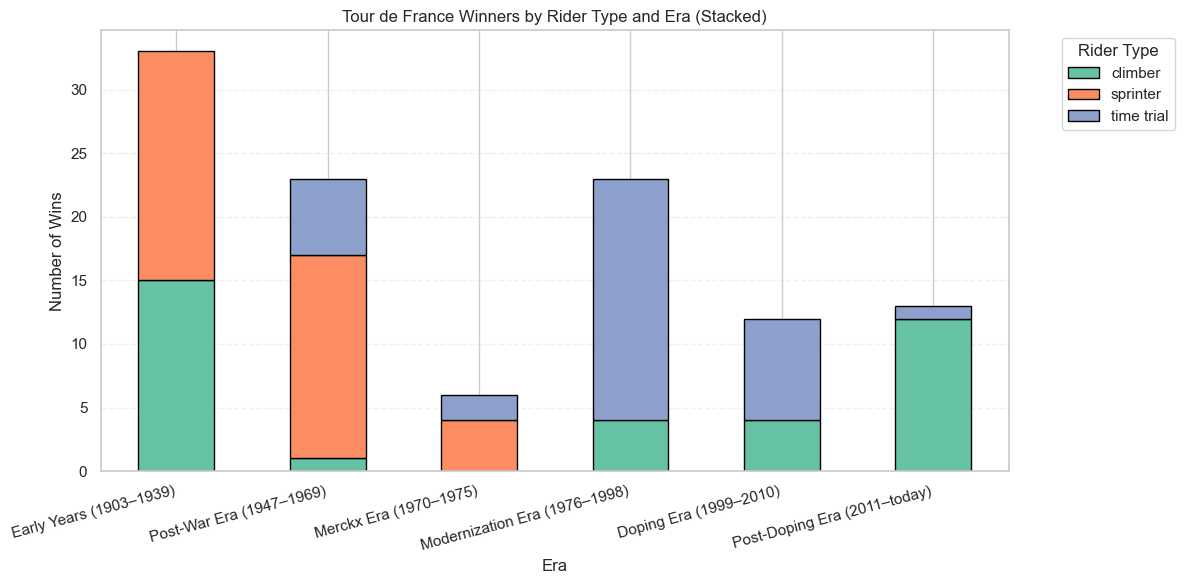

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Group and pivot data
pivot_df = (
    merged_df
    .groupby(['era', 'rider_type_(pps)'])
    .size()
    .reset_index(name='count')
    .pivot(index='era', columns='rider_type_(pps)', values='count')
    .fillna(0)
    .astype(int)
)

# Ensure the era order
era_order = [
    'Early Years (1903–1939)',
    'Post-War Era (1947–1969)',
    'Merckx Era (1970–1975)',
    'Modernization Era (1976–1998)',
    'Doping Era (1999–2010)',
    'Post-Doping Era (2011–today)'
]
pivot_df = pivot_df.reindex(era_order)

# Custom color palette
color_palette = plt.cm.Set2.colors  # or define your own as a dict if needed

# Plot
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=color_palette,
    edgecolor='black'
)

plt.title('Tour de France Winners by Rider Type and Era (Stacked)')
plt.xlabel('Era')
plt.ylabel('Number of Wins')
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Rider Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


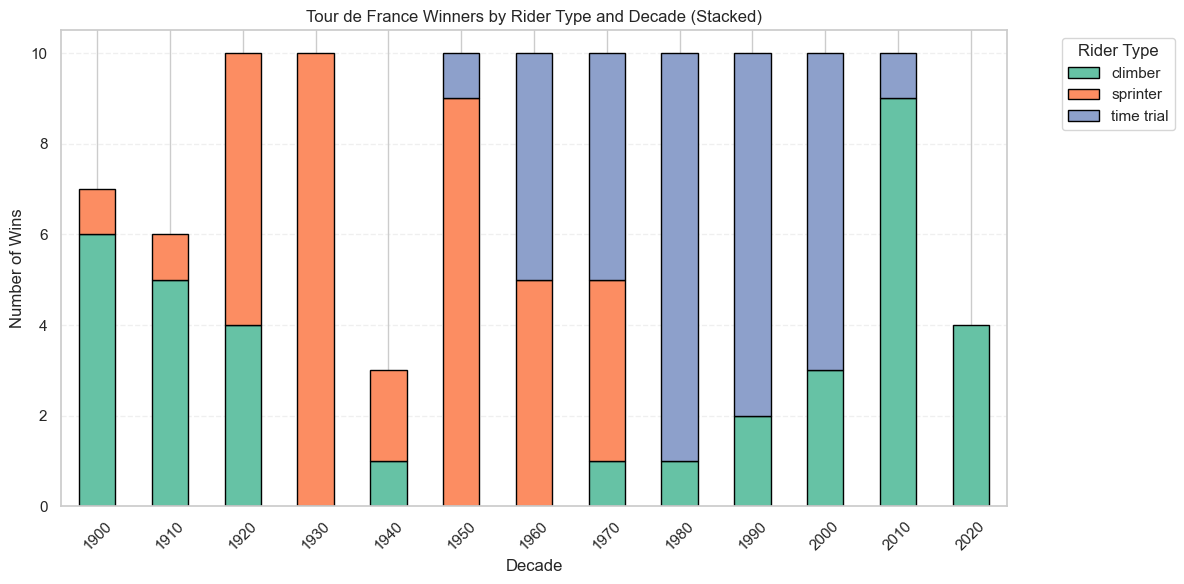

In [59]:
# Group and pivot data by decade and rider type
pivot_decade_df = (
    merged_df
    .groupby(['decade', 'rider_type_(pps)'])
    .size()
    .reset_index(name='count')
    .pivot(index='decade', columns='rider_type_(pps)', values='count')
    .fillna(0)
    .astype(int)
)

# Sort decades for x-axis order
pivot_decade_df = pivot_decade_df.sort_index()

# Use a color palette
colors = plt.cm.Set2.colors

# Plot
pivot_decade_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=colors,
    edgecolor='black'
)

plt.title('Tour de France Winners by Rider Type and Decade (Stacked)')
plt.xlabel('Decade')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Rider Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

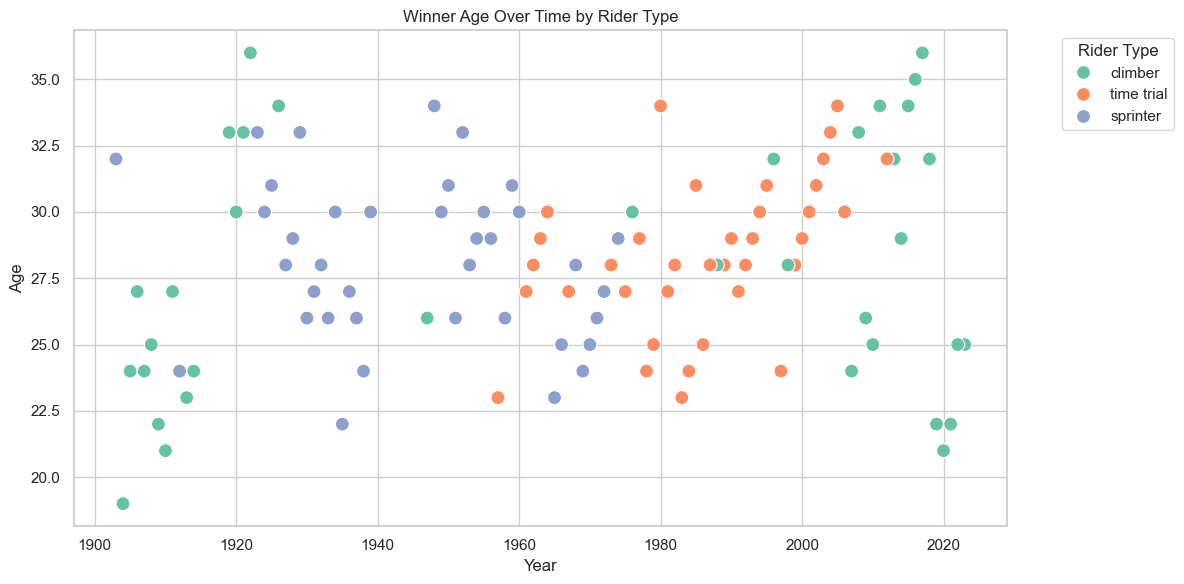

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='year', y='age', hue='rider_type_(pps)', palette='Set2', s=100)
plt.title('Winner Age Over Time by Rider Type')
plt.xlabel('Year')
plt.ylabel('Age')
plt.legend(title='Rider Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


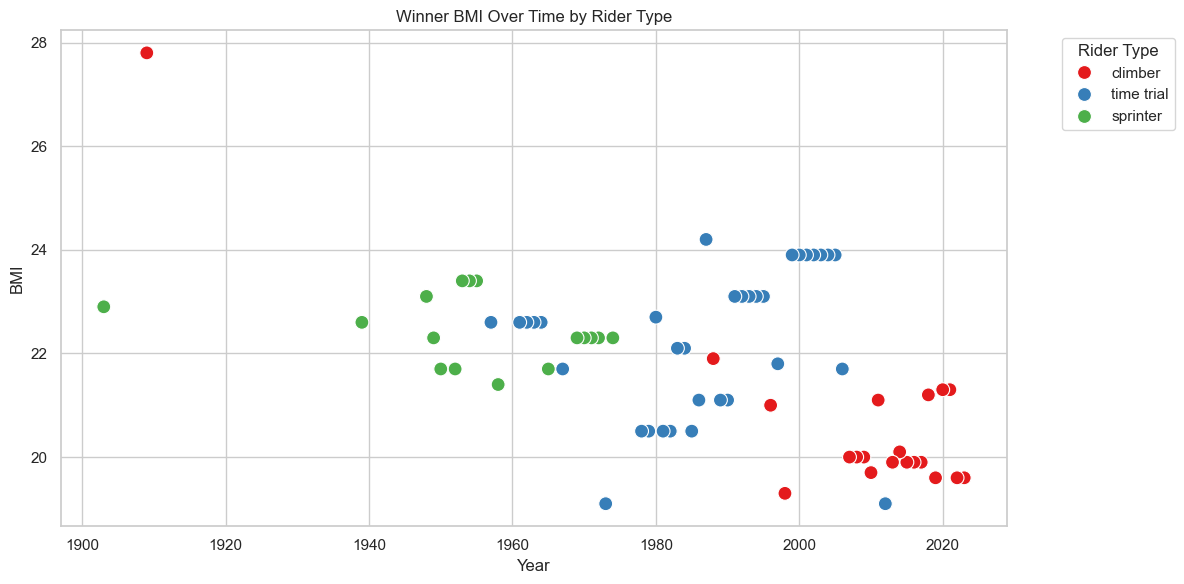

In [61]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='year', y='bmi', hue='rider_type_(pps)', palette='Set1', s=100)
plt.title('Winner BMI Over Time by Rider Type')
plt.xlabel('Year')
plt.ylabel('BMI')
plt.legend(title='Rider Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\raclo\AppData\Local\Temp\ipykernel_40956\3768734739.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='rider_type_(pps)', y='bmi', palette='Set2')


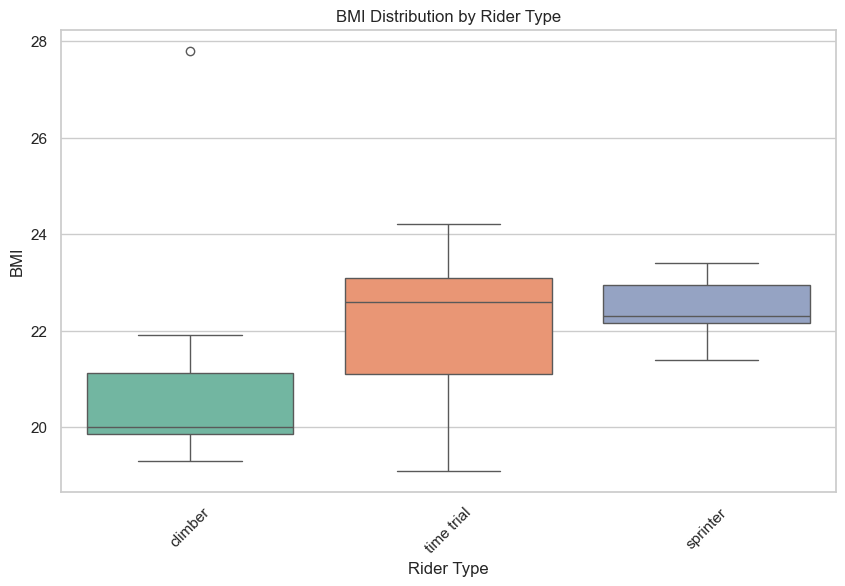

In [64]:
# Plot BMI Distribution by Rider Type
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to compare BMI across rider types
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='rider_type_(pps)', y='bmi', palette='Set2')
plt.title('BMI Distribution by Rider Type')
plt.xlabel('Rider Type')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()


C:\Users\raclo\AppData\Local\Temp\ipykernel_40956\454195277.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='rider_type_(pps)', y='age', palette='Set2')


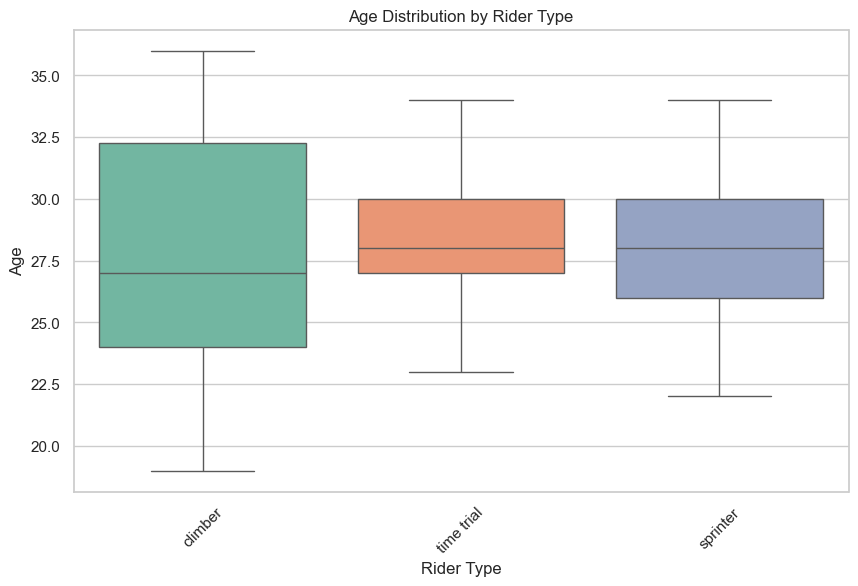

In [65]:
# Plot Age Distribution by Rider Type
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to compare BMI across rider types
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='rider_type_(pps)', y='age', palette='Set2')
plt.title('Age Distribution by Rider Type')
plt.xlabel('Rider Type')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

C:\Users\raclo\AppData\Local\Temp\ipykernel_40956\116646677.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='rider_type_(pps)', y='weight_kg', palette='Set2')


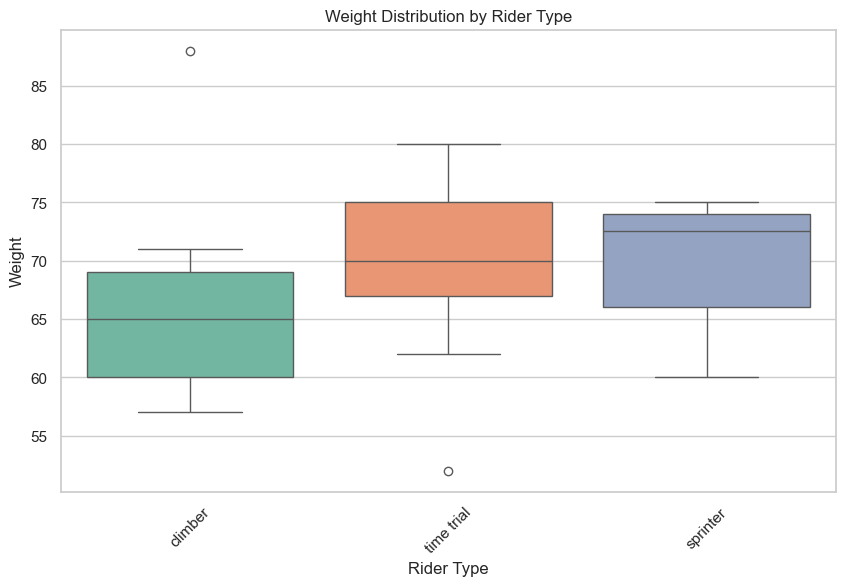

In [66]:
# Plot Weight Distribution by Rider Type
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to compare BMI across rider types
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='rider_type_(pps)', y='weight_kg', palette='Set2')
plt.title('Weight Distribution by Rider Type')
plt.xlabel('Rider Type')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()


C:\Users\raclo\AppData\Local\Temp\ipykernel_40956\1564381090.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='rider_type_(pps)', y='height_m', palette='Set2')


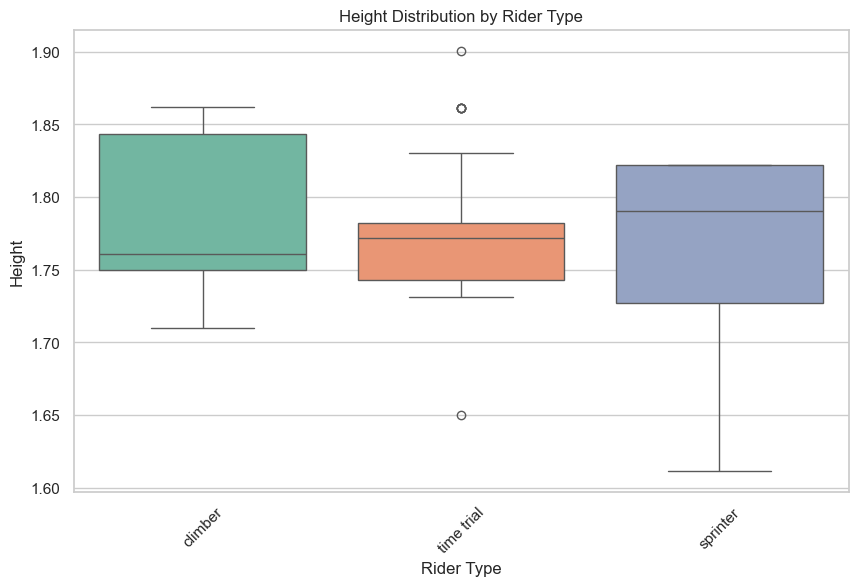

In [67]:
# Plot Height Distribution by Rider Type
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to compare BMI across rider types
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='rider_type_(pps)', y='height_m', palette='Set2')
plt.title('Height Distribution by Rider Type')
plt.xlabel('Rider Type')
plt.ylabel('Height')
plt.xticks(rotation=45)
plt.show()

In [68]:
# Filter the dataframe for years 1980 and onwards
df_1980_onwards = merged_df[merged_df['year'] >= 1980]


In [69]:
# Filter the dataframe for years 1980 and onwards
df_2000_onwards = merged_df[merged_df['year'] >= 2000]


C:\Users\raclo\AppData\Local\Temp\ipykernel_40956\866053930.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_1980_onwards, x='rider_type_(pps)', y='bmi', palette='Set2')


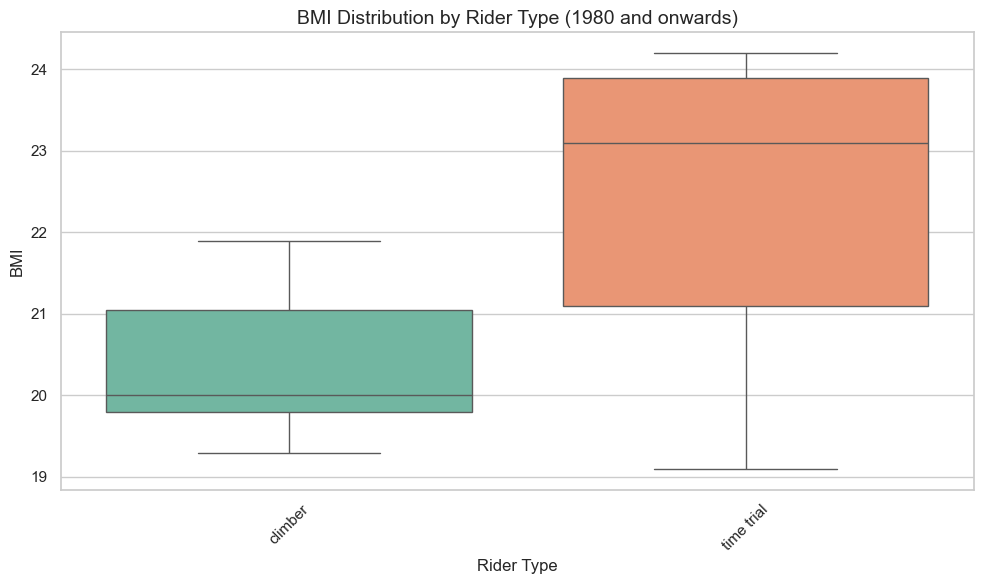

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=df_1980_onwards, x='rider_type_(pps)', y='bmi', palette='Set2')

# Set the title and labels
plt.title('BMI Distribution by Rider Type (1980 and onwards)', fontsize=14)
plt.xlabel('Rider Type', fontsize=12)
plt.ylabel('BMI', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\raclo\AppData\Local\Temp\ipykernel_40956\377456430.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2000_onwards, x='rider_type_(pps)', y='bmi', palette='Set2')


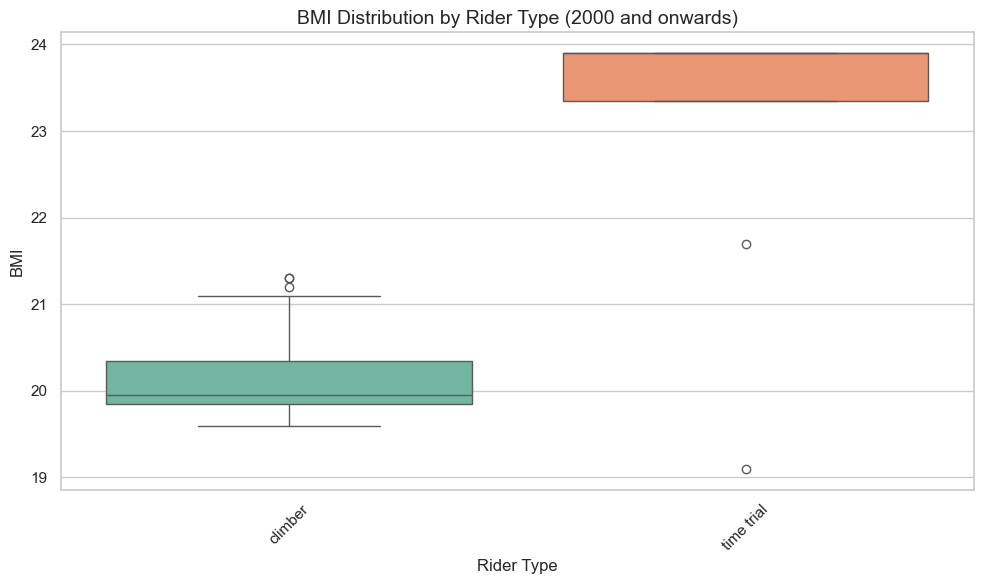

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=df_2000_onwards, x='rider_type_(pps)', y='bmi', palette='Set2')

# Set the title and labels
plt.title('BMI Distribution by Rider Type (2000 and onwards)', fontsize=14)
plt.xlabel('Rider Type', fontsize=12)
plt.ylabel('BMI', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [72]:
merged_df.head()

year  tour_no            winner   country               team  \
0  2023      110  Jonas Vingegaard   Denmark   Team Jumbo Visma   
1  2022      109  Jonas Vingegaard   Denmark   Team Jumbo Visma   
2  2021      108     Tadej Pogacar  Slovenia  UAE Team Emirates   
3  2020      107     Tadej Pogacar  Slovenia  UAE Team Emirates   
4  2019      106       Egan Bernal  Colombia        Team Ineos    

   tour_overall_length_km  age   bmi  weight_kg  height_m rider_type_(pps)  \
0                  3406.0   25  19.6       60.0  1.749636          climber   
1                  3328.0   25  19.6       60.0  1.749636          climber   
2                  3383.0   22  21.3       66.0  1.760282          climber   
3                  3482.0   21  21.3       66.0  1.760282          climber   
4                  3366.0   22  19.6       60.0  1.749636          climber   

  close_rider_type_(pps)  pre_tour_gc_wins  pre_tour_wins  \
0                    NaN                 3             11   
1                    NaN                 0              2   
2                    NaN                 3              4   
3                    NaN                 1              4   
4                    NaN                 2              1   

   total_completed_stage_races  total_completed_day_races  gt_wins  \
0                            5                          1        1   
1                            4                          7        0   
2                            4                          7        1   
3                            3                          6        0   
4                            4                          7        0   

   nat_tt_wins  nat_rr_wins  worlds_rr_wins  decade  \
0            0            0               0    2020   
1            0            0               0    2020   
2            1            1               0    2020   
3            1            1               0    2020   
4            0            0               0    2010   

                            era  
0  Post-Doping Era (2011–today)  
1  Post-Doping Era (2011–today)  
2  Post-Doping Era (2011–today)  
3  Post-Doping Era (2011–today)  
4  Post-Doping Era (2011–today)

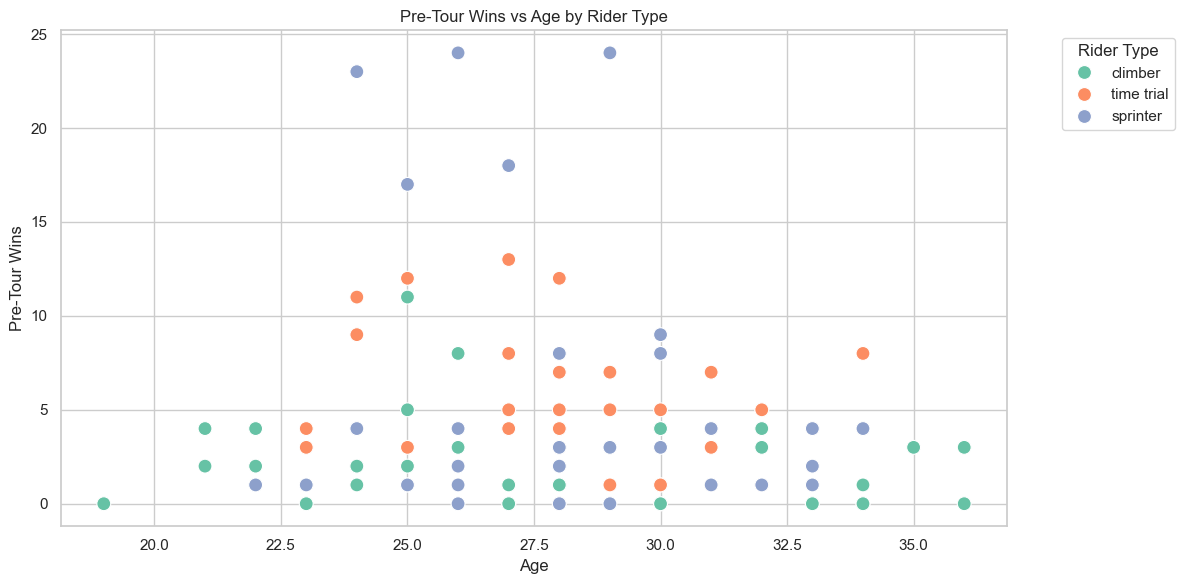

In [73]:
# sns.scatterplot(data=merged_df, x='age', y='pre_tour_wins', hue='winner')
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='age', y='pre_tour_wins', hue='rider_type_(pps)', palette='Set2', s=100)
plt.title('Pre-Tour Wins vs Age by Rider Type')
plt.xlabel('Age')
plt.ylabel('Pre-Tour Wins')
plt.legend(title='Rider Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
        

C:\Users\raclo\AppData\Local\Temp\ipykernel_40956\1199498360.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


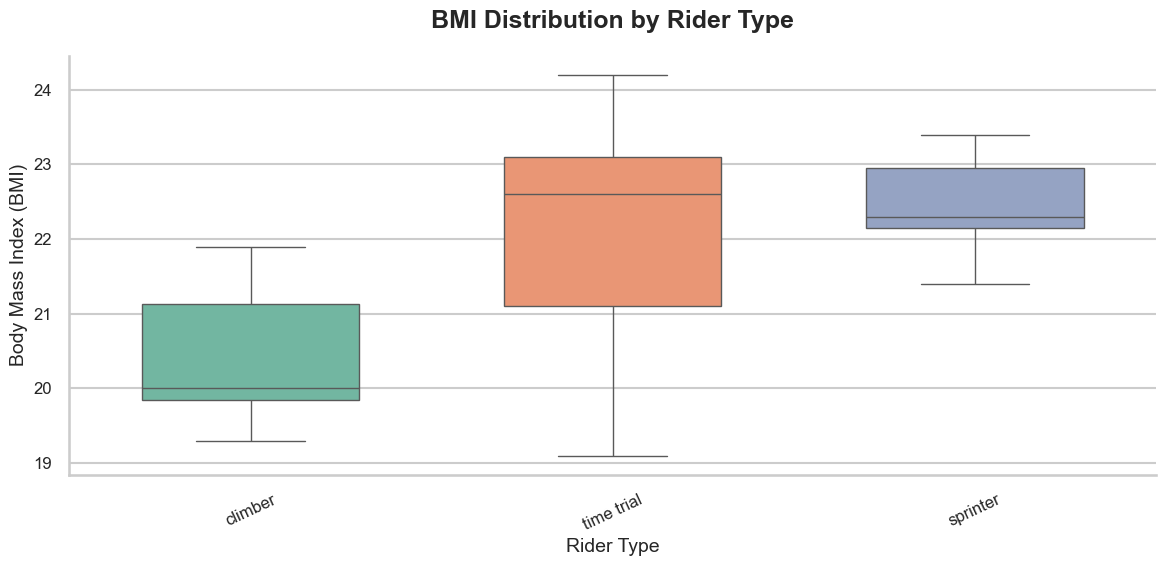

In [74]:
# BMI Distribution by Rider Type
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style for presentations
sns.set(style="whitegrid", context="talk", palette="Set2")

# Set the figure size *before* plotting
plt.figure(figsize=(12, 6))

# Create the boxplot
ax = sns.boxplot(
    data=merged_df,
    x='rider_type_(pps)',
    y='bmi',
    palette='Set2',
    width=0.6,
    showfliers=False,  # Hide outliers for cleaner look
)

# Improve readability
plt.title('BMI Distribution by Rider Type', fontsize=18, weight='bold', pad=20)
plt.xlabel('Rider Type', fontsize=14)
plt.ylabel('Body Mass Index (BMI)', fontsize=14)
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right spines
sns.despine()

# Adjust layout
plt.tight_layout()
plt.show()


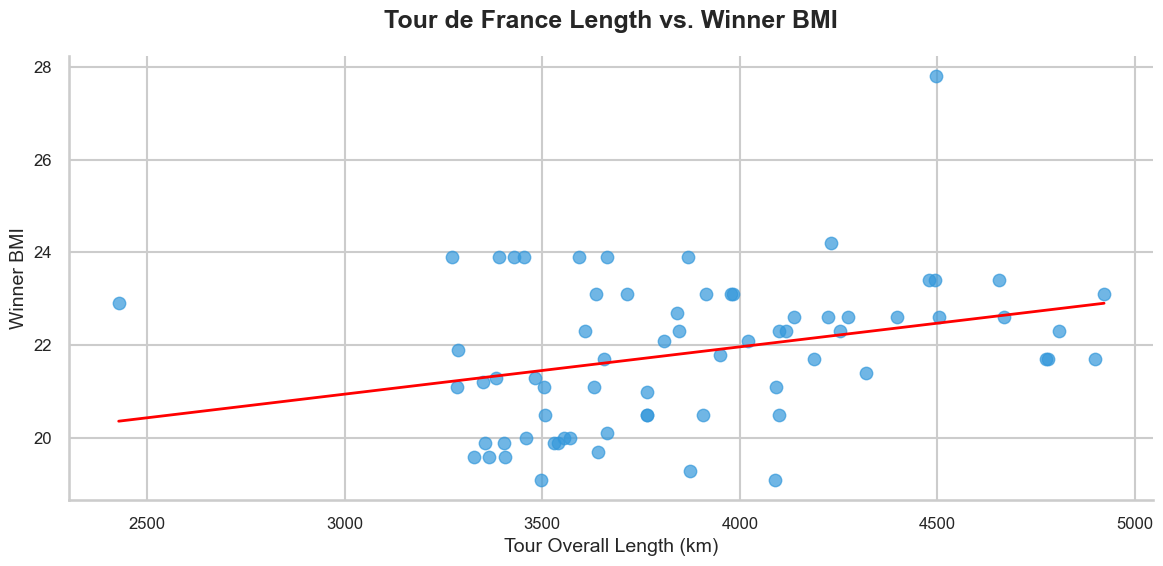

In [75]:
# Plot tour length vs. winner's BMI over time with a trendline
import matplotlib.pyplot as plt
import seaborn as sns

# Clean style for presentations
sns.set(style="whitegrid", context="talk")

# Set figure size
plt.figure(figsize=(12, 6))

# Scatterplot with trendline
sns.regplot(
    data=merged_df,
    x='tour_overall_length_km',
    y='bmi',
    scatter_kws={'s': 80, 'alpha': 0.7, 'color': '#3498db'},
    line_kws={'color': 'red', 'lw': 2},
    ci=None  # Remove confidence interval for a cleaner look
)

# Labels and title
plt.title('Tour de France Length vs. Winner BMI', fontsize=18, weight='bold', pad=20)
plt.xlabel('Tour Overall Length (km)', fontsize=14)
plt.ylabel('Winner BMI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Layout and styling
sns.despine()
plt.tight_layout()
plt.show()


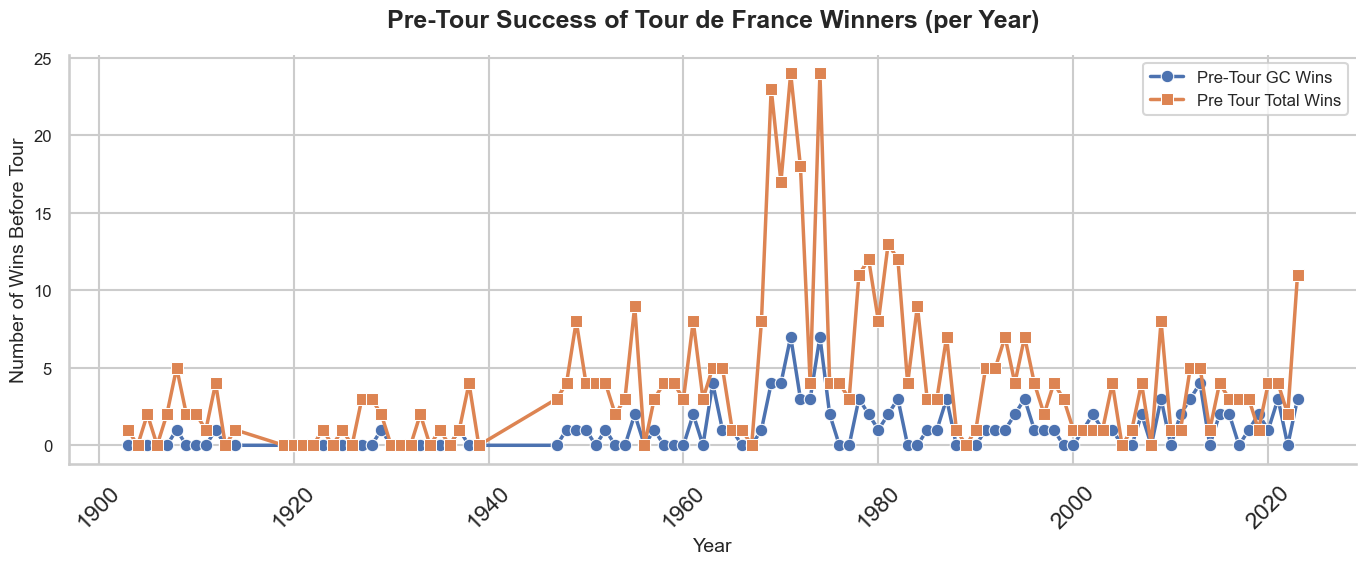

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for presentation
sns.set(style="whitegrid", context="talk")

# Set figure size
plt.figure(figsize=(14, 6))

# Plot both GC wins and total wins over time
sns.lineplot(data=merged_df, x='year', y='pre_tour_gc_wins', label='Pre-Tour GC Wins', marker='o', linewidth=2.5)
sns.lineplot(data=merged_df, x='year', y='pre_tour_wins', label='Pre Tour Total Wins', marker='s', linewidth=2.5)

# Labels and styling
plt.title('Pre-Tour Success of Tour de France Winners (per Year)', fontsize=18, weight='bold', pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Wins Before Tour', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.grid(True)
sns.despine()
plt.tight_layout()
plt.show()


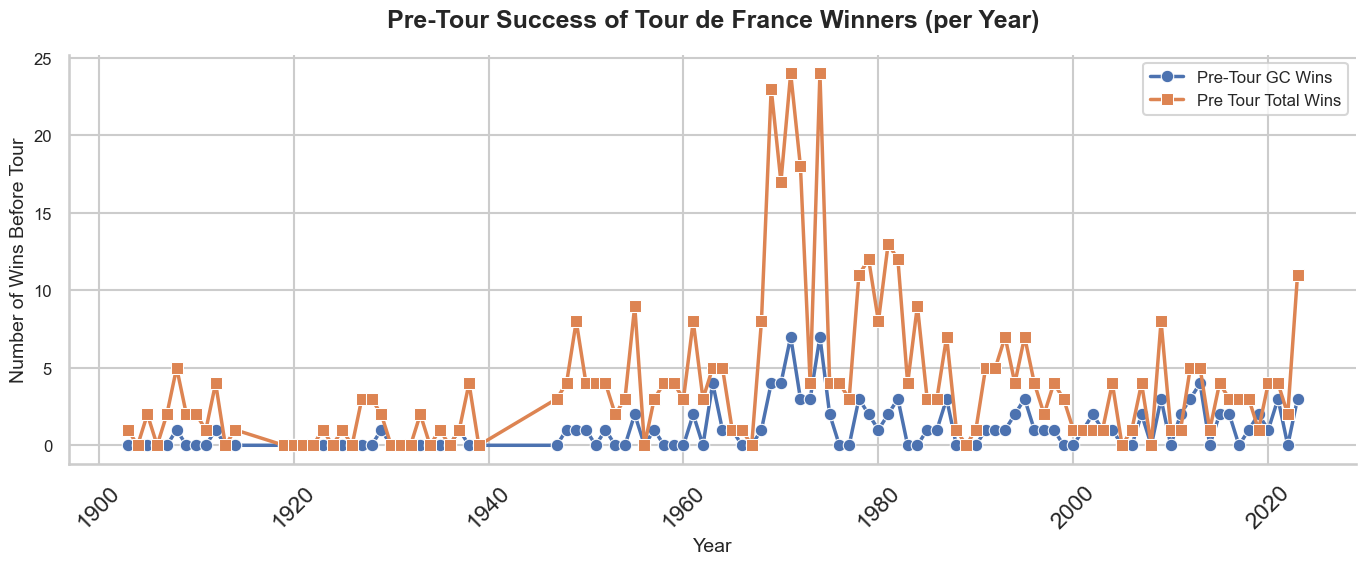

In [77]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set style for presentation
sns.set(style="whitegrid", context="talk")

# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

# Plot both GC wins and total wins over time
sns.lineplot(data=merged_df, x='year', y='pre_tour_gc_wins', label='Pre-Tour GC Wins', marker='o', linewidth=2.5, ax=ax)
sns.lineplot(data=merged_df, x='year', y='pre_tour_wins', label='Pre Tour Total Wins', marker='s', linewidth=2.5, ax=ax)

# Labels and styling
ax.set_title('Pre-Tour Success of Tour de France Winners (per Year)', fontsize=18, weight='bold', pad=20)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Wins Before Tour', fontsize=14)
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', labelsize=12)
ax.grid(True)
sns.despine(ax=ax)
plt.tight_layout()
plt.show()

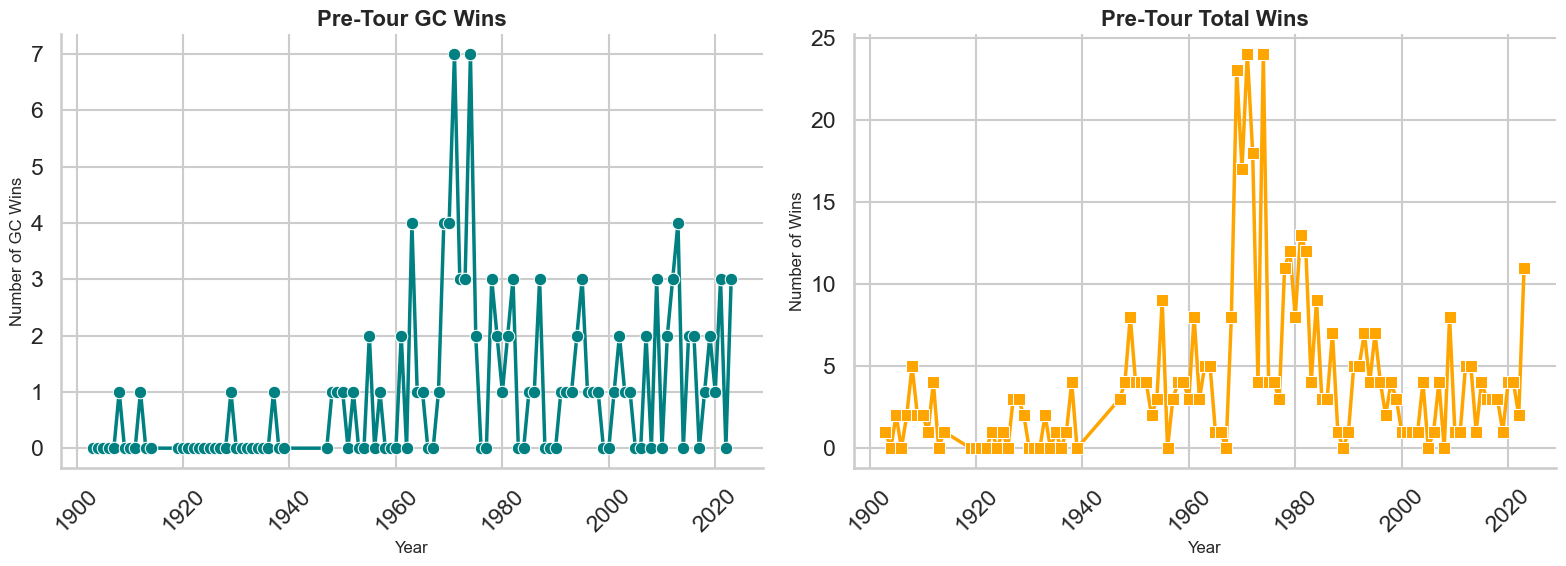

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for presentation
sns.set(style="whitegrid", context="talk")

# Create 1 row, 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# Subplot 1: Pre-Tour GC Wins
sns.lineplot(
    data=merged_df,
    x='year',
    y='pre_tour_gc_wins',
    marker='o',
    linewidth=2.5,
    ax=axes[0],
    color='teal'
)
axes[0].set_title('Pre-Tour GC Wins', fontsize=16, weight='bold')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Number of GC Wins', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Subplot 2: Pre-Tour Total Wins
sns.lineplot(
    data=merged_df,
    x='year',
    y='pre_tour_wins',
    marker='s',
    linewidth=2.5,
    ax=axes[1],
    color='orange'
)
axes[1].set_title('Pre-Tour Total Wins', fontsize=16, weight='bold')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Number of Wins', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Remove top/right spines and adjust layout
sns.despine()
plt.tight_layout()
plt.show()


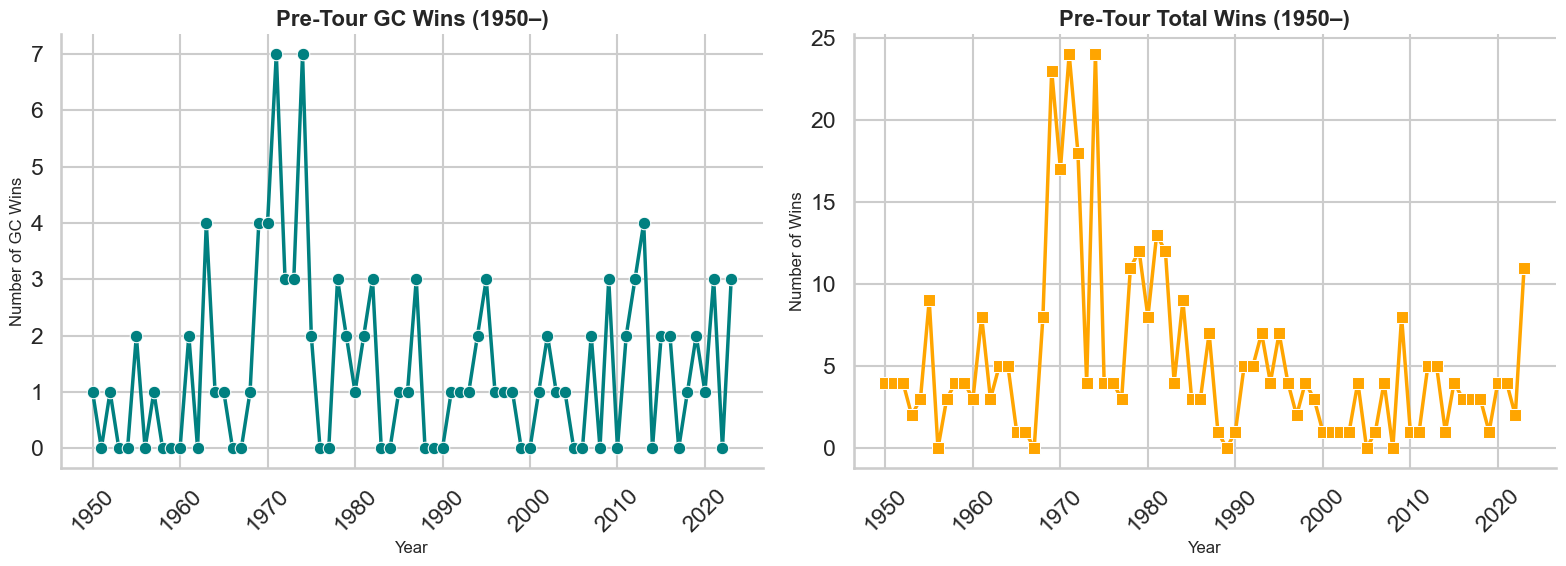

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data from 1950 onwards
df_1950_onwards = merged_df[merged_df['year'] >= 1950]

# Set style for presentation
sns.set(style="whitegrid", context="talk")

# Create 1 row, 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# Subplot 1: Pre-Tour GC Wins
sns.lineplot(
    data=df_1950_onwards,
    x='year',
    y='pre_tour_gc_wins',
    marker='o',
    linewidth=2.5,
    ax=axes[0],
    color='teal'
)
axes[0].set_title('Pre-Tour GC Wins (1950–)', fontsize=16, weight='bold')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Number of GC Wins', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Subplot 2: Pre-Tour Total Wins
sns.lineplot(
    data=df_1950_onwards,
    x='year',
    y='pre_tour_wins',
    marker='s',
    linewidth=2.5,
    ax=axes[1],
    color='orange'
)
axes[1].set_title('Pre-Tour Total Wins (1950–)', fontsize=16, weight='bold')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Number of Wins', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Remove top/right spines and adjust layout
sns.despine()
plt.tight_layout()
plt.show()


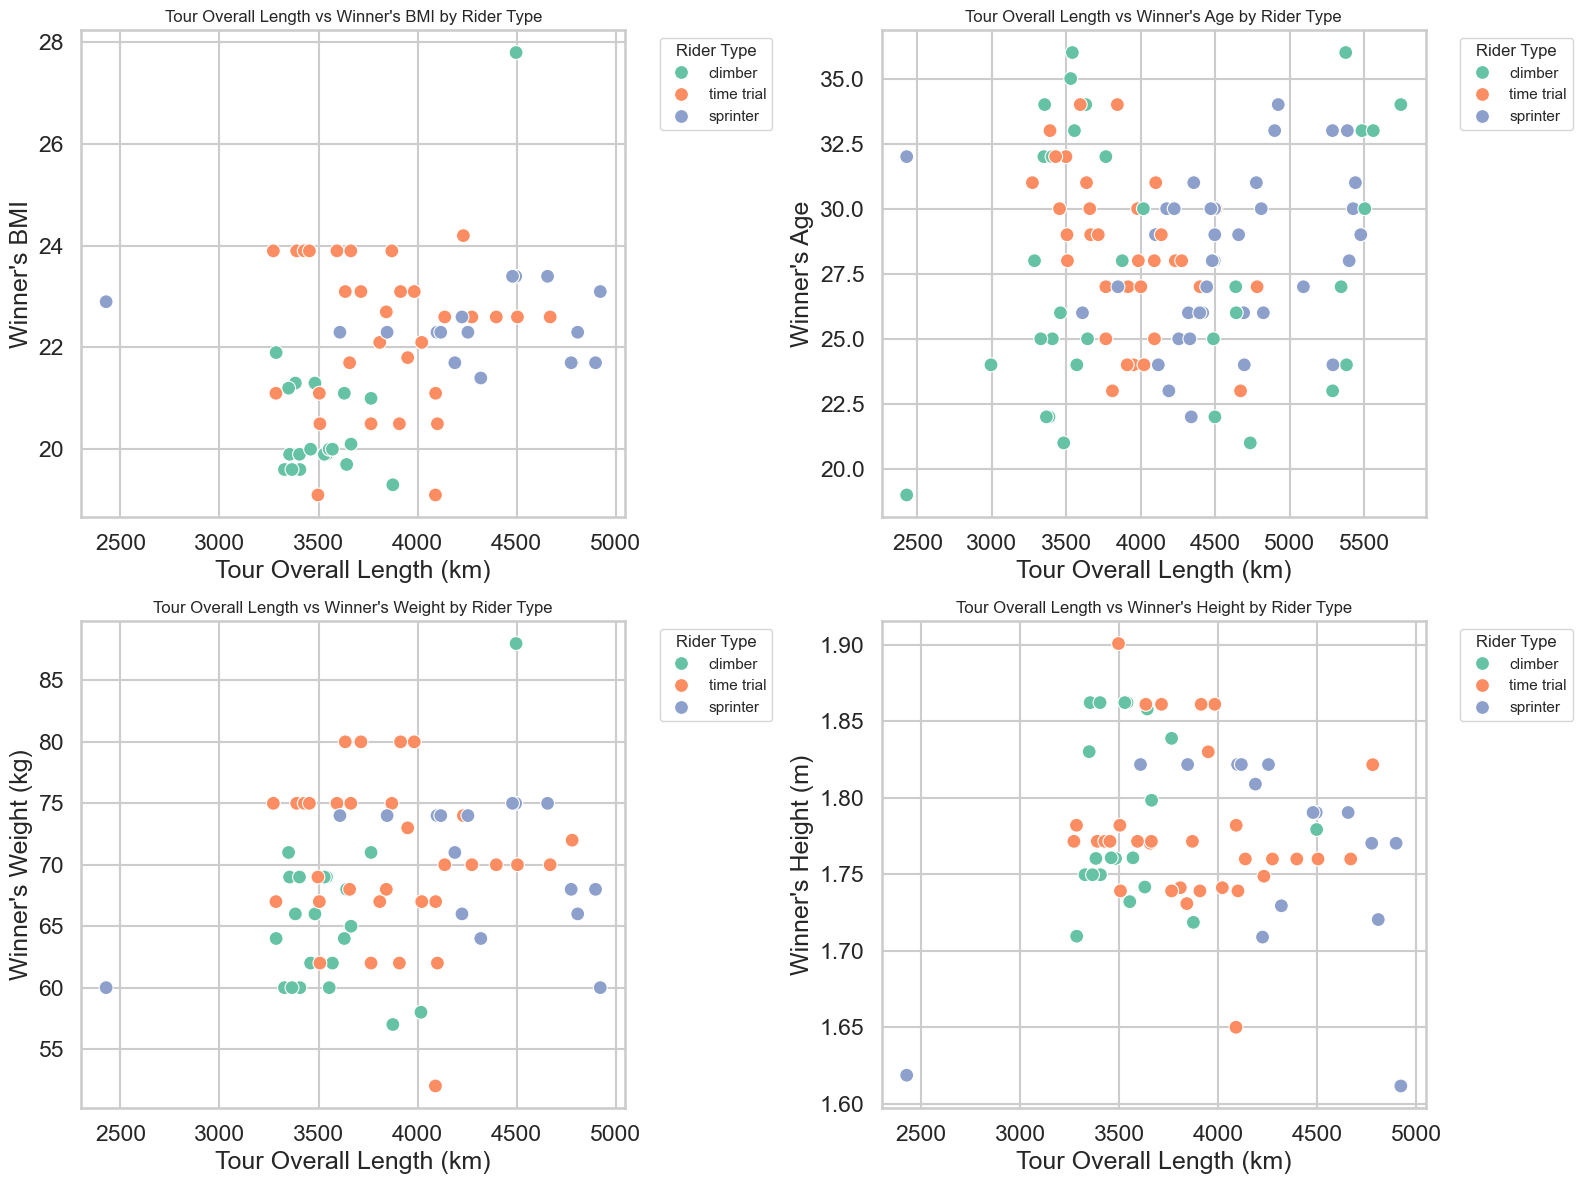

In [80]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set up a 2x2 grid of subplots for the four scatterplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.set(style="whitegrid")

# Plot 1: Tour length vs. winner's BMI
sns.scatterplot(
    data=merged_df,
    x='tour_overall_length_km',
    y='bmi',
    hue='rider_type_(pps)',
    palette='Set2',
    s=100,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Tour Overall Length vs Winner's BMI by Rider Type")
axes[0, 0].set_xlabel('Tour Overall Length (km)')
axes[0, 0].set_ylabel("Winner's BMI")
axes[0, 0].legend(title='Rider Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Tour length vs. winner's age
sns.scatterplot(
    data=merged_df,
    x='tour_overall_length_km',
    y='age',
    hue='rider_type_(pps)',
    palette='Set2',
    s=100,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Tour Overall Length vs Winner's Age by Rider Type")
axes[0, 1].set_xlabel('Tour Overall Length (km)')
axes[0, 1].set_ylabel("Winner's Age")
axes[0, 1].legend(title='Rider Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3: Tour length vs. winner's weight
sns.scatterplot(
    data=merged_df,
    x='tour_overall_length_km',
    y='weight_kg',
    hue='rider_type_(pps)',
    palette='Set2',
    s=100,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Tour Overall Length vs Winner's Weight by Rider Type")
axes[1, 0].set_xlabel('Tour Overall Length (km)')
axes[1, 0].set_ylabel("Winner's Weight (kg)")
axes[1, 0].legend(title='Rider Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 4: Tour length vs. winner's height
sns.scatterplot(
    data=merged_df,
    x='tour_overall_length_km',
    y='height_m',
    hue='rider_type_(pps)',
    palette='Set2',
    s=100,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Tour Overall Length vs Winner's Height by Rider Type")
axes[1, 1].set_xlabel('Tour Overall Length (km)')
axes[1, 1].set_ylabel("Winner's Height (m)")
axes[1, 1].legend(title='Rider Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

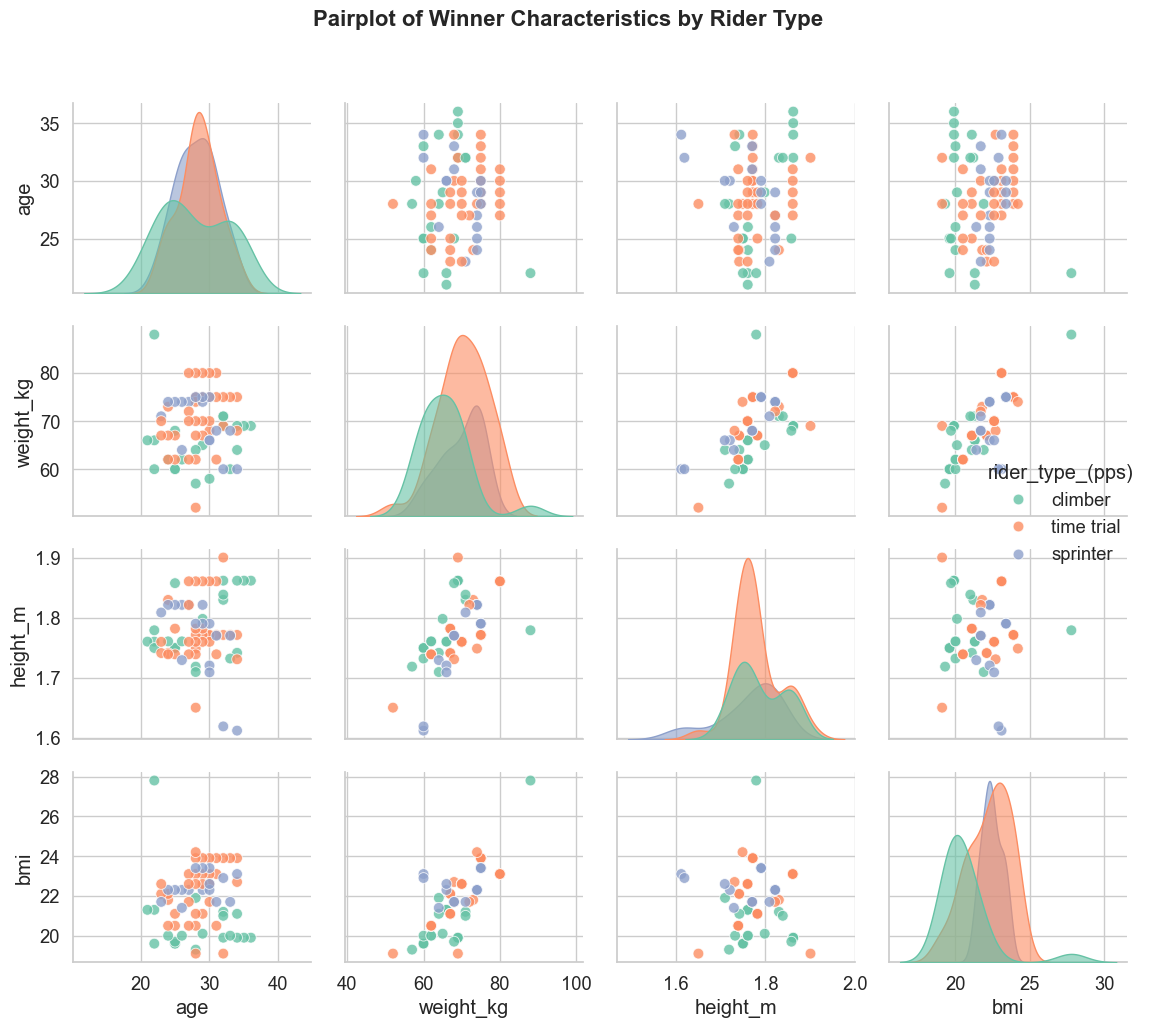

In [81]:
import seaborn as sns

# Improved pairplot visualization for winner characteristics by rider type

import matplotlib.pyplot as plt

# Set a clean, readable style and larger context for better visuals
sns.set(style="whitegrid", context="notebook", font_scale=1.2)

# Choose a color palette for better distinction
pairplot_palette = sns.color_palette("Set2", n_colors=merged_df['rider_type_(pps)'].nunique())

# Generate the pairplot with diagonal KDEs, larger markers, and improved layout
g = sns.pairplot(
    data=merged_df,
    vars=['age', 'weight_kg', 'height_m', 'bmi'],
    hue='rider_type_(pps)',
    palette=pairplot_palette,
    markers='o',
    diag_kind='kde',
    plot_kws={'s': 60, 'alpha': 0.8, 'edgecolor': 'w'},
    diag_kws={'fill': True, 'alpha': 0.6}
)

# Add a main title and adjust layout
g.fig.suptitle('Pairplot of Winner Characteristics by Rider Type', y=1.03, fontsize=16, weight='bold')
g.fig.tight_layout()
plt.show()

In [ ]:
df_merged.dtypes

In [ ]:
print(merged_df.columns.tolist())


In [82]:
# Select numerical columns for correlation analysis
numeric_df = merged_df.select_dtypes(include='number')


In [83]:
print(numeric_df.columns.tolist())

['year', 'tour_no', 'tour_overall_length_km', 'age', 'bmi', 'weight_kg', 'height_m', 'pre_tour_gc_wins', 'pre_tour_wins', 'total_completed_stage_races', 'total_completed_day_races', 'gt_wins', 'nat_tt_wins', 'nat_rr_wins', 'worlds_rr_wins', 'decade']


In [84]:
corr_matrix = numeric_df.corr()


In [85]:
# Encode rider types into numerical values
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid overwriting original
df_encoded = merged_df.copy()

# Encode rider_type_(pps)
le = LabelEncoder()
df_encoded['rider_type_code'] = le.fit_transform(df_encoded['rider_type_(pps)'].astype(str))


In [86]:
dict(zip(le.classes_, le.transform(le.classes_)))


{'climber': 0, 'sprinter': 1, 'time trial': 2}

In [87]:
numeric_df = df_encoded.select_dtypes(include='number')


In [88]:
numeric_df

year  tour_no  tour_overall_length_km  age   bmi  weight_kg  height_m  \
0    2023      110                  3406.0   25  19.6       60.0  1.749636   
1    2022      109                  3328.0   25  19.6       60.0  1.749636   
2    2021      108                  3383.0   22  21.3       66.0  1.760282   
3    2020      107                  3482.0   21  21.3       66.0  1.760282   
4    2019      106                  3366.0   22  19.6       60.0  1.749636   
..    ...      ...                     ...  ...   ...        ...       ...   
105  1907        5                     NaN   24   NaN        NaN       NaN   
106  1906        4                  4637.0   27   NaN        NaN       NaN   
107  1905        3                  2994.0   24   NaN        NaN       NaN   
108  1904        2                  2428.0   19   NaN        NaN       NaN   
109  1903        1                  2428.0   32  22.9       60.0  1.618668   

     pre_tour_gc_wins  pre_tour_wins  total_completed_stage_races  \
0                   3             11                            5   
1                   0              2                            4   
2                   3              4                            4   
3                   1              4                            3   
4                   2              1                            4   
..                ...            ...                          ...   
105                 0              2                            0   
106                 0              0                            0   
107                 0              2                            0   
108                 0              0                            0   
109                 0              1                            0   

     total_completed_day_races  gt_wins  nat_tt_wins  nat_rr_wins  \
0                            1        1            0            0   
1                            7        0            0            0   
2                            7        1            1            1   
3                            6        0            1            1   
4                            7        0            0            0   
..                         ...      ...          ...          ...   
105                          3        0            0            0   
106                          1        0            0            0   
107                          2        0            0            0   
108                          1        0            0            0   
109                          1        0            0            0   

     worlds_rr_wins  decade  rider_type_code  
0                 0    2020                0  
1                 0    2020                0  
2                 0    2020                0  
3                 0    2020                0  
4                 0    2010                0  
..              ...     ...              ...  
105               0    1900                0  
106               0    1900                0  
107               0    1900                0  
108               0    1900                0  
109               0    1900                1  

[110 rows x 17 columns]

In [89]:
numeric_df = numeric_df.drop(columns=['tour_no'], errors='ignore')

In [90]:
corr_matrix = numeric_df.corr()


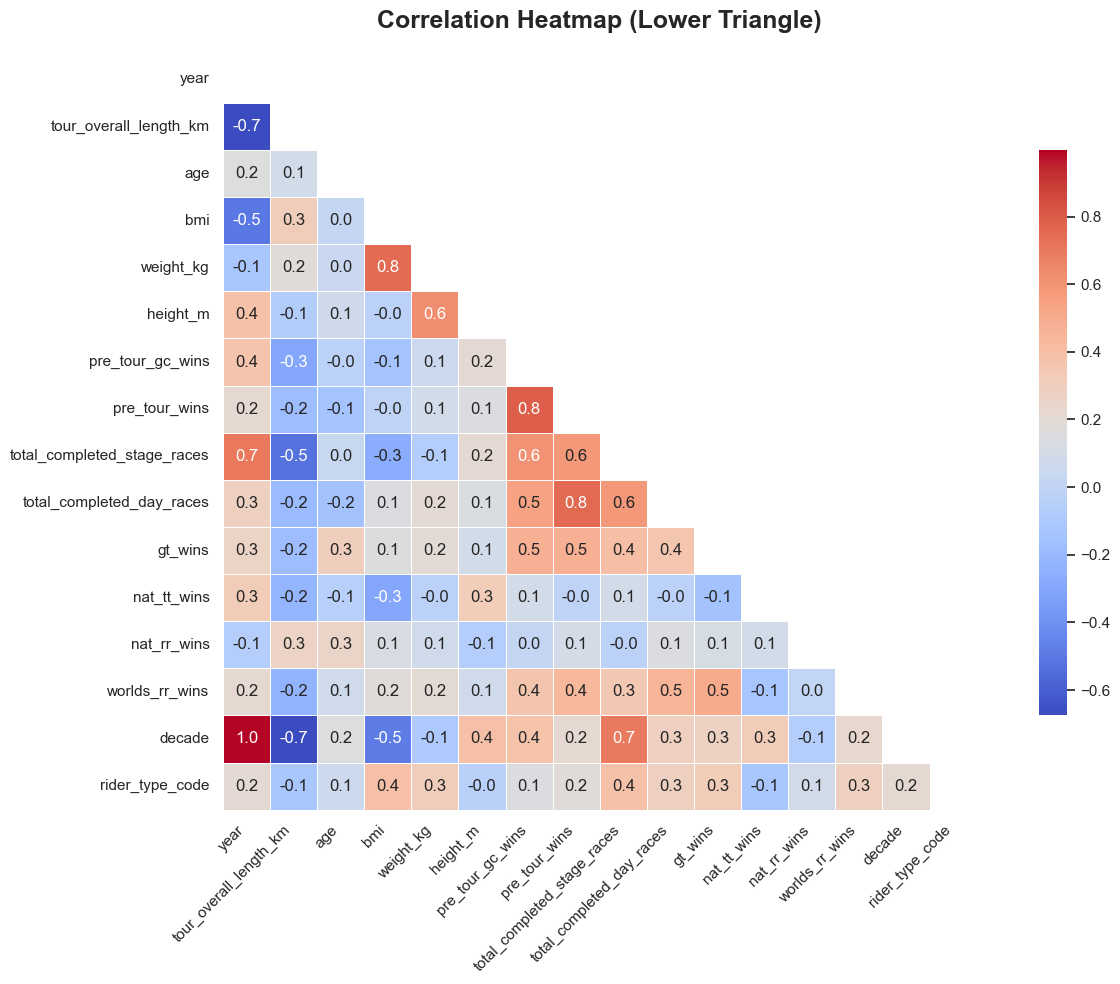

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style without grid
sns.set(style="white")  # no background grid

corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)
plt.title('Correlation Heatmap (Lower Triangle)', fontsize=18, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
